In [ ]:
import pandas as pd
import os
import cPickle as pickle
import matplotlib.pylab as plt
from collections import defaultdict
import re
import numpy as np

import seaborn
%matplotlib inline
from thesis.utils.metrics import *

In [124]:
SECTIONS_LEFT_MIN = 1.4
SECTIONS_LEFT_MAX = 2.5
SECTIONS_RIGHT_MIN = 0.2
SECTIONS_RIGHT_MAX = 1

CLASSES_SVM_LEFT_MIN = 2
CLASSES_SVM_LEFT_MAX = 16
CLASSES_SVM_RIGHT_MIN = 0
CLASSES_SVM_RIGHT_MAX = 1
CLASSES_NN_LEFT_MIN = 2
CLASSES_NN_LEFT_MAX = 16
CLASSES_NN_RIGHT_MIN = 0
CLASSES_NN_RIGHT_MAX = 1

SUBCLASSES_SVM_LEFT_MIN = 5
SUBCLASSES_SVM_LEFT_MAX = 65
SUBCLASSES_SVM_RIGHT_MIN = 0
SUBCLASSES_SVM_RIGHT_MAX = 1
SUBCLASSES_NN_LEFT_MIN = 5
SUBCLASSES_NN_LEFT_MAX = 65
SUBCLASSES_NN_RIGHT_MIN = 0
SUBCLASSES_NN_RIGHT_MAX = 1


# CLASSES_SVM_LEFT_MIN = 11
# CLASSES_SVM_LEFT_MAX = 16
# CLASSES_SVM_RIGHT_MIN = 0
# CLASSES_SVM_RIGHT_MAX = 1
# CLASSES_NN_LEFT_MIN = 2.5
# CLASSES_NN_LEFT_MAX = 3.75
# CLASSES_NN_RIGHT_MIN = 0
# CLASSES_NN_RIGHT_MAX = 1

# SUBCLASSES_SVM_LEFT_MIN = 35
# SUBCLASSES_SVM_LEFT_MAX = 65
# SUBCLASSES_SVM_RIGHT_MIN = 0
# SUBCLASSES_SVM_RIGHT_MAX = 1
# SUBCLASSES_NN_LEFT_MIN = 6
# SUBCLASSES_NN_LEFT_MAX = 9
# SUBCLASSES_NN_RIGHT_MIN = 0
# SUBCLASSES_NN_RIGHT_MAX = 1


## Epochs

In [22]:
max_epochs = 20
epochs = range(1,max_epochs + 1)
coverage_error_1 = [2.30, 2.05, 1.96, 1.94, 1.96, 1.92, 1.93, 1.90]
coverage_error_2 = [2.13, 1.92, 1.88, 1.82, 1.81, 1.79, 1.78, 1.77, 1.79, 1.78, 1.78, 1.78, 1.77, 1.76]
coverage_error_3 = [2.01, 1.96, 1.91, 1.88, 1.85, 1.85, 1.85, 1.84]
coverage_error_4 = [2.16, 2.05, 2.01, 1.96, 1.93, 1.90, 1.88, 1.87, 1.86, 1.84, 1.82, 1.82, 1.84]
coverage_error_5 = [2.10, 1.88, 1.80, 1.79, 1.75, 1.76]

coverage_error_1 = coverage_error_1 + [None]* (max_epochs-len(coverage_error_1))
coverage_error_2 = coverage_error_2 + [None]* (max_epochs-len(coverage_error_2))
coverage_error_3 = coverage_error_3 + [None]* (max_epochs-len(coverage_error_3))
coverage_error_4 = coverage_error_4 + [None]* (max_epochs-len(coverage_error_4))
coverage_error_5 = coverage_error_5 + [None]* (max_epochs-len(coverage_error_5))

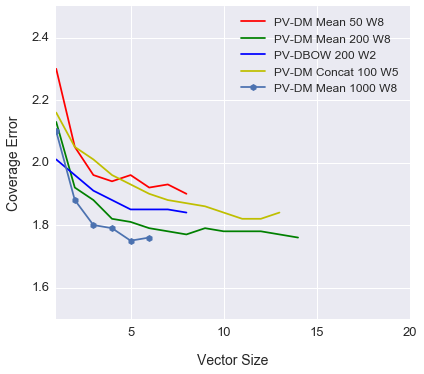

In [26]:
name_1 = 'PV-DM Mean 50 W8'
name_2 = 'PV-DM Mean 200 W8'
name_3 = 'PV-DBOW 200 W2'
name_4 = 'PV-DM Concat 100 W5'
name_5 = 'PV-DM Mean 1000 W8'

fig = plt.figure(figsize=(12,7), dpi=120)
ax1 = plt.subplot(121)
fig.subplots_adjust(top=0.72, bottom=0.1, left=0.05, right=0.95)

ax1.set_xlabel("Vector Size", fontsize=X_LABEL_FONT_SIZE, labelpad=X_LABEL_PAD)
ax1.set_ylabel("Coverage Error", fontsize=Y_LABEL_FONT_SIZE, labelpad=Y_LABEL_PAD)
ax1.axis([epochs[0], epochs[-1], 1.5, 2.5])
coverage_error_1_line, = ax1.plot(epochs, coverage_error_1, 'r-', label='{}'.format(name_1))
coverage_error_2_line, = ax1.plot(epochs, coverage_error_2, 'g-', label='{}'.format(name_2))
coverage_error_3_line, = ax1.plot(epochs, coverage_error_3, 'b-', label='{}'.format(name_3))
coverage_error_4_line, = ax1.plot(epochs, coverage_error_4, 'y-', label='{}'.format(name_4))
coverage_error_5_line, = ax1.plot(epochs, coverage_error_5, 'h-', label='{}'.format(name_5))
ax1.tick_params(labelsize=AXIS_LABELS_FONT_SIZE)

ax1.legend(handles=[coverage_error_1_line, coverage_error_2_line, 
                    coverage_error_3_line, coverage_error_4_line, coverage_error_5_line], fontsize=LEGEND_FONT_SIZE)

## PV-DM vs PV-DBOW

### Sections

In [145]:
vector_sizes =         [50,    100,   200,   500,   1000]

coverage_errors_dm =   [1.9,   1.911, 1.757, 1.791, 1.747]
coverage_errors_dbow = [1.856, 1.894, 1.847, 1.842, 1.949]

f1_micro_dm =          [0.581, 0.57,  0.616, 0.603, 0.616]
f1_micro_dbow =        [0.577, 0.577, 0.597, 0.595, 0.568]

f1_macro_dm =          [0.492, 0.485, 0.52,  0.513, 0.523]
f1_macro_dbow =        [0.485, 0.486, 0.501, 0.501, 0.482]

top_3_dm =             [0.895, 0.892, 0.922, 0.916, 0.924]
top_3_dbow =           [0.904, 0.895, 0.906, 0.906, 0.886]

In [146]:
AXIS_LABELS_FONT_SIZE = 13
X_LABEL_PAD = 15
Y_LABEL_PAD = 10
X_LABEL_FONT_SIZE = 14
Y_LABEL_FONT_SIZE = 14
LEGEND_FONT_SIZE = 12

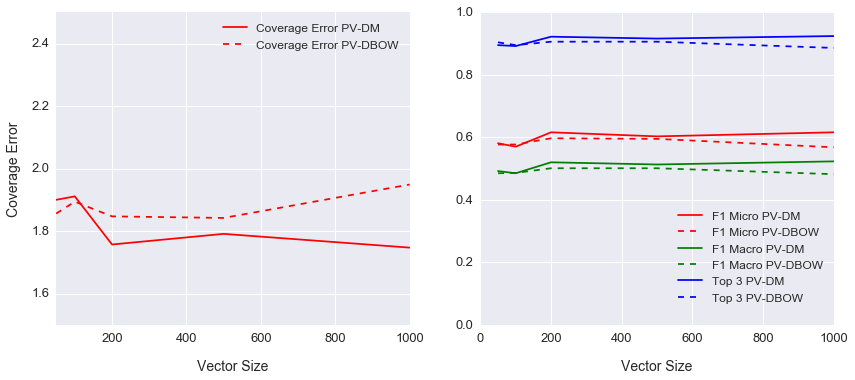

In [147]:
fig = plt.figure(figsize=(12,7), dpi=120)
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
fig.subplots_adjust(top=0.72, bottom=0.1, left=0.05, right=0.95)

ax1.set_xlabel("Vector Size", fontsize=X_LABEL_FONT_SIZE, labelpad=X_LABEL_PAD)
ax1.set_ylabel("Coverage Error", fontsize=Y_LABEL_FONT_SIZE, labelpad=Y_LABEL_PAD)
ax1.axis([vector_sizes[0], vector_sizes[-1], SECTIONS_LEFT_MIN, SECTIONS_LEFT_MAX])
coverage_error_dm_line, = ax1.plot(vector_sizes, coverage_errors_dm, 'r-', label='Coverage Error PV-DM')
coverage_error_dbow_line, = ax1.plot(vector_sizes, coverage_errors_dbow, 'r--', label='Coverage Error PV-DBOW')
ax1.tick_params(labelsize=AXIS_LABELS_FONT_SIZE)


ax2.set_xlabel("Vector Size", fontsize=X_LABEL_FONT_SIZE, labelpad=X_LABEL_PAD)
f1_micro_dm_line, = ax2.plot(vector_sizes, f1_micro_dm, 'r-', label='F1 Micro PV-DM')
f1_micro_dbow_line, = ax2.plot(vector_sizes, f1_micro_dbow, 'r--', label='F1 Micro PV-DBOW')
f1_macro_dm_line, = ax2.plot(vector_sizes, f1_macro_dm, 'g-', label='F1 Macro PV-DM')
f1_macro_dbow_line, = ax2.plot(vector_sizes, f1_macro_dbow, 'g--', label='F1 Macro PV-DBOW')
top_3_dm_line, = ax2.plot(vector_sizes, top_3_dm, 'b-', label='Top 3 PV-DM')
top_3_dbow_line, = ax2.plot(vector_sizes, top_3_dbow, 'b--', label='Top 3 PV-DBOW')
ax2.tick_params(labelsize=AXIS_LABELS_FONT_SIZE)
ax2.set_ylim([SECTIONS_RIGHT_MIN, SECTIONS_RIGHT_MAX])


ax1.legend(handles=[coverage_error_dm_line, coverage_error_dbow_line], fontsize=LEGEND_FONT_SIZE)
#ax.axis([first_epoch, last_epoch, 0, self.coverage_error_max])

ax2.legend(handles=[f1_micro_dm_line, f1_micro_dbow_line, 
                    f1_macro_dm_line, f1_macro_dbow_line, 
                    top_3_dm_line, top_3_dbow_line], 
           bbox_to_anchor=(1, 0.4), fontsize=LEGEND_FONT_SIZE)

### Classes

In [148]:
vector_sizes =         [50,    100,   200,   500,   1000]

coverage_errors_dm =   [14.70,   14.16, 13.58, 12.95, 13.62]
f1_micro_dm =          [0.446, 0.465,  0.475, 0.497, 0.5]
f1_macro_dm =          [0.022, 0.027, 0.031,  0.034, 0.034]
top_3_dm =             [0.609, 0.597, 0.655, 0.662, 0.648]

coverage_errors_dbow = [14.53, 13.17, 12.63, 12.53, 15.14]
f1_micro_dbow =        [0.408, 0.429, 0.465, 0.512, 0.518]
f1_macro_dbow =        [0.020, 0.025, 0.031, 0.050, 0.063]
top_3_dbow =           [0.613, 0.633, 0.637, 0.593, 0.563]

In [149]:
AXIS_LABELS_FONT_SIZE = 13
X_LABEL_PAD = 15
Y_LABEL_PAD = 10
X_LABEL_FONT_SIZE = 14
Y_LABEL_FONT_SIZE = 14
LEGEND_FONT_SIZE = 12

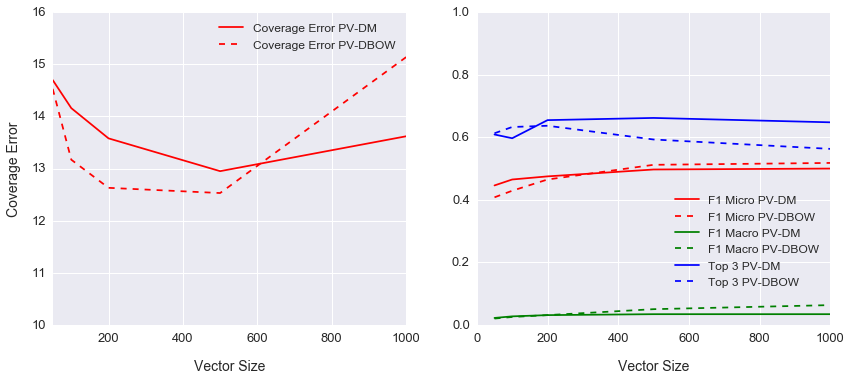

In [150]:
fig = plt.figure(figsize=(12,7), dpi=120)
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
fig.subplots_adjust(top=0.72, bottom=0.1, left=0.05, right=0.95)

ax1.set_xlabel("Vector Size", fontsize=X_LABEL_FONT_SIZE, labelpad=X_LABEL_PAD)
ax1.set_ylabel("Coverage Error", fontsize=Y_LABEL_FONT_SIZE, labelpad=Y_LABEL_PAD)
ax1.axis([vector_sizes[0], vector_sizes[-1], CLASSES_LEFT_MIN, CLASSES_LEFT_MAX])
coverage_error_dm_line, = ax1.plot(vector_sizes, coverage_errors_dm, 'r-', label='Coverage Error PV-DM')
coverage_error_dbow_line, = ax1.plot(vector_sizes, coverage_errors_dbow, 'r--', label='Coverage Error PV-DBOW')
ax1.tick_params(labelsize=AXIS_LABELS_FONT_SIZE)


ax2.set_xlabel("Vector Size", fontsize=X_LABEL_FONT_SIZE, labelpad=X_LABEL_PAD)
f1_micro_dm_line, = ax2.plot(vector_sizes, f1_micro_dm, 'r-', label='F1 Micro PV-DM')
f1_micro_dbow_line, = ax2.plot(vector_sizes, f1_micro_dbow, 'r--', label='F1 Micro PV-DBOW')
f1_macro_dm_line, = ax2.plot(vector_sizes, f1_macro_dm, 'g-', label='F1 Macro PV-DM')
f1_macro_dbow_line, = ax2.plot(vector_sizes, f1_macro_dbow, 'g--', label='F1 Macro PV-DBOW')
top_3_dm_line, = ax2.plot(vector_sizes, top_3_dm, 'b-', label='Top 3 PV-DM')
top_3_dbow_line, = ax2.plot(vector_sizes, top_3_dbow, 'b--', label='Top 3 PV-DBOW')
ax2.tick_params(labelsize=AXIS_LABELS_FONT_SIZE)
ax2.set_ylim([CLASSES_RIGHT_MIN, CLASSES_RIGHT_MAX])


ax1.legend(handles=[coverage_error_dm_line, coverage_error_dbow_line], fontsize=LEGEND_FONT_SIZE)
#ax.axis([first_epoch, last_epoch, 0, self.coverage_error_max])

ax2.legend(handles=[f1_micro_dm_line, f1_micro_dbow_line, 
                    f1_macro_dm_line, f1_macro_dbow_line, 
                    top_3_dm_line, top_3_dbow_line], 
           bbox_to_anchor=(1, 0.45), fontsize=LEGEND_FONT_SIZE)

### Subclasses

In [151]:
vector_sizes =         [50,    100,   200,   500,   1000]

coverage_errors_dm =   [61.75,   55.25, 51.31, 48.92, 49.75]
f1_micro_dm =          [0.248, 0.280,  0.286, 0.311, 0.314]
f1_macro_dm =          [0.007, 0.009, 0.011,  0.013, 0.013]
top_3_dm =             [0.150, 0.175, 0.178, 0.197, 0.200]

coverage_errors_dbow = [60.20, 56.41, 47.43, 39.98, 45.62]
f1_micro_dbow =        [0.234, 0.248, 0.291, 0.345, 0.362]
f1_macro_dbow =        [0.007, 0.009, 0.012, 0.023, 0.034]
top_3_dbow =           [0.140, 0.150, 0.182, 0.232, 0.255]

In [152]:
AXIS_LABELS_FONT_SIZE = 13
X_LABEL_PAD = 15
Y_LABEL_PAD = 10
X_LABEL_FONT_SIZE = 14
Y_LABEL_FONT_SIZE = 14
LEGEND_FONT_SIZE = 12

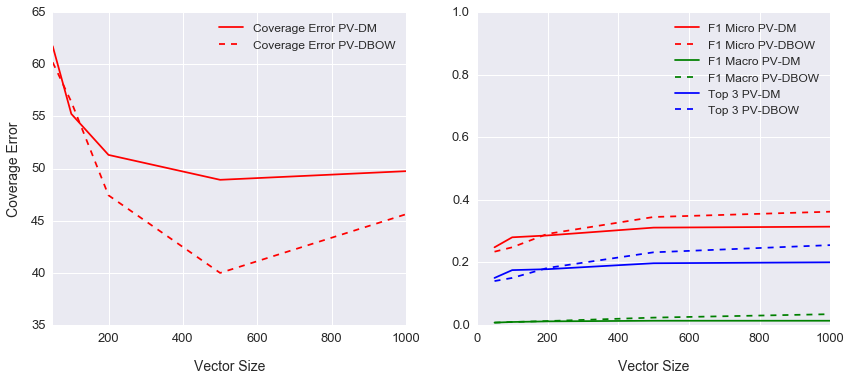

In [155]:
fig = plt.figure(figsize=(12,7), dpi=120)
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
fig.subplots_adjust(top=0.72, bottom=0.1, left=0.05, right=0.95)

ax1.set_xlabel("Vector Size", fontsize=X_LABEL_FONT_SIZE, labelpad=X_LABEL_PAD)
ax1.set_ylabel("Coverage Error", fontsize=Y_LABEL_FONT_SIZE, labelpad=Y_LABEL_PAD)
ax1.axis([vector_sizes[0], vector_sizes[-1], SUBCLASSES_LEFT_MIN, SUBCLASSES_LEFT_MAX])
coverage_error_dm_line, = ax1.plot(vector_sizes, coverage_errors_dm, 'r-', label='Coverage Error PV-DM')
coverage_error_dbow_line, = ax1.plot(vector_sizes, coverage_errors_dbow, 'r--', label='Coverage Error PV-DBOW')
ax1.tick_params(labelsize=AXIS_LABELS_FONT_SIZE)


ax2.set_xlabel("Vector Size", fontsize=X_LABEL_FONT_SIZE, labelpad=X_LABEL_PAD)
f1_micro_dm_line, = ax2.plot(vector_sizes, f1_micro_dm, 'r-', label='F1 Micro PV-DM')
f1_micro_dbow_line, = ax2.plot(vector_sizes, f1_micro_dbow, 'r--', label='F1 Micro PV-DBOW')
f1_macro_dm_line, = ax2.plot(vector_sizes, f1_macro_dm, 'g-', label='F1 Macro PV-DM')
f1_macro_dbow_line, = ax2.plot(vector_sizes, f1_macro_dbow, 'g--', label='F1 Macro PV-DBOW')
top_3_dm_line, = ax2.plot(vector_sizes, top_3_dm, 'b-', label='Top 3 PV-DM')
top_3_dbow_line, = ax2.plot(vector_sizes, top_3_dbow, 'b--', label='Top 3 PV-DBOW')
ax2.tick_params(labelsize=AXIS_LABELS_FONT_SIZE)
ax2.set_ylim([SUBCLASSES_RIGHT_MIN, SUBCLASSES_RIGHT_MAX])


ax1.legend(handles=[coverage_error_dm_line, coverage_error_dbow_line], fontsize=LEGEND_FONT_SIZE)
#ax.axis([first_epoch, last_epoch, 0, self.coverage_error_max])

ax2.legend(handles=[f1_micro_dm_line, f1_micro_dbow_line, 
                    f1_macro_dm_line, f1_macro_dbow_line, 
                    top_3_dm_line, top_3_dbow_line], 
           bbox_to_anchor=(1, 1), fontsize=LEGEND_FONT_SIZE)

## PV-DM Mean vs Concatenation

### Sections

In [241]:
vector_sizes =      [50,    100,   200,   500]

coverage_errors_1 = [1.9,   1.911, 1.757, 1.791]
coverage_errors_2 = [1.897, 1.895, 3.503, None]

f1_micro_1 =        [0.581, 0.57,  0.616, 0.603]
f1_micro_2 =        [0.574, 0.581, 0.243, None]

f1_macro_1 =        [0.492, 0.485, 0.52,  0.513]
f1_macro_2 =        [0.484, 0.489, 0.194, None]

top_3_1 =           [0.895, 0.892, 0.922, 0.916]
top_3_2 =           [0.896, 0.897, 0.645, None]

In [242]:
AXIS_LABELS_FONT_SIZE = 13
X_LABEL_PAD = 15
Y_LABEL_PAD = 10
X_LABEL_FONT_SIZE = 14
Y_LABEL_FONT_SIZE = 14
LEGEND_FONT_SIZE = 12

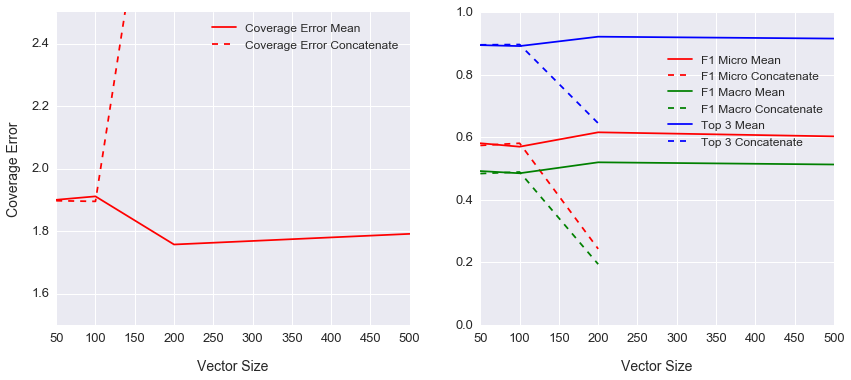

In [243]:
name_1 = 'Mean'
name_2 = 'Concatenate'

fig = plt.figure(figsize=(12,7), dpi=120)
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
# fig.suptitle('sdfsdf')
fig.subplots_adjust(top=0.72, bottom=0.1, left=0.05, right=0.95)

ax1.set_xlabel("Vector Size", fontsize=X_LABEL_FONT_SIZE, labelpad=X_LABEL_PAD)
ax1.set_ylabel("Coverage Error", fontsize=Y_LABEL_FONT_SIZE, labelpad=Y_LABEL_PAD)
ax1.axis([vector_sizes[0], vector_sizes[-1], SECTIONS_LEFT_MIN, SECTIONS_LEFT_MAX])
coverage_error_1_line, = ax1.plot(vector_sizes, coverage_errors_1, 'r-', label='Coverage Error {}'.format(name_1))
coverage_error_2_line, = ax1.plot(vector_sizes, coverage_errors_2, 'r--', label='Coverage Error {}'.format(name_2))
ax1.tick_params(labelsize=AXIS_LABELS_FONT_SIZE)


ax2.set_xlabel("Vector Size", fontsize=X_LABEL_FONT_SIZE, labelpad=X_LABEL_PAD)
f1_micro_1_line, = ax2.plot(vector_sizes, f1_micro_1, 'r-', label='F1 Micro {}'.format(name_1))
f1_micro_2_line, = ax2.plot(vector_sizes, f1_micro_2, 'r--', label='F1 Micro {}'.format(name_2))
f1_macro_1_line, = ax2.plot(vector_sizes, f1_macro_1, 'g-', label='F1 Macro {}'.format(name_1))
f1_macro_2_line, = ax2.plot(vector_sizes, f1_macro_2, 'g--', label='F1 Macro {}'.format(name_2))
top_3_1_line, = ax2.plot(vector_sizes, top_3_1, 'b-', label='Top 3 {}'.format(name_1))
top_3_2_line, = ax2.plot(vector_sizes, top_3_2, 'b--', label='Top 3 {}'.format(name_2))
ax2.tick_params(labelsize=AXIS_LABELS_FONT_SIZE)
ax2.set_ylim([SECTIONS_RIGHT_MIN, SECTIONS_RIGHT_MAX])


ax1.legend(handles=[coverage_error_1_line, coverage_error_2_line], fontsize=LEGEND_FONT_SIZE)
#ax.axis([first_epoch, last_epoch, 0, self.coverage_error_max])

ax2.legend(handles=[f1_micro_1_line, f1_micro_2_line, 
                    f1_macro_1_line, f1_macro_2_line, 
                    top_3_1_line, top_3_2_line], 
           bbox_to_anchor=(1, 0.9), fontsize=LEGEND_FONT_SIZE)

### Classes

In [175]:
vector_sizes =      [50,    100,   200,   500]

coverage_errors_1 =   [14.70,   14.16, 13.58, 12.95]
f1_micro_1 =          [0.446, 0.465,  0.475, 0.497]
f1_macro_1 =          [0.022, 0.027, 0.031,  0.034]
top_3_1 =             [0.609, 0.597, 0.655, 0.662]

coverage_errors_2 = [11.82, 11.10, 24.82, None]
f1_micro_2 =        [0.469, 0.478, 0.000, None]
f1_macro_2 =        [0.030, 0.038, 0.000, None]
top_3_2 =           [0.621, 0.631, 0.170, None]

In [176]:
AXIS_LABELS_FONT_SIZE = 13
X_LABEL_PAD = 15
Y_LABEL_PAD = 10
X_LABEL_FONT_SIZE = 14
Y_LABEL_FONT_SIZE = 14
LEGEND_FONT_SIZE = 12

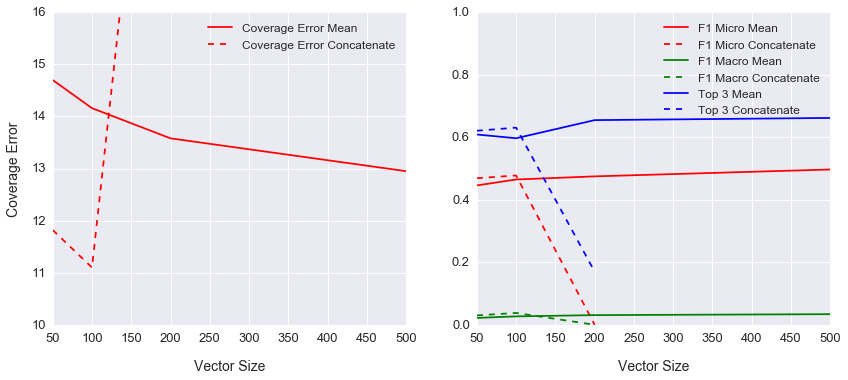

In [178]:
name_1 = 'Mean'
name_2 = 'Concatenate'

fig = plt.figure(figsize=(12,7), dpi=120)
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
fig.subplots_adjust(top=0.72, bottom=0.1, left=0.05, right=0.95)

ax1.set_xlabel("Vector Size", fontsize=X_LABEL_FONT_SIZE, labelpad=X_LABEL_PAD)
ax1.set_ylabel("Coverage Error", fontsize=Y_LABEL_FONT_SIZE, labelpad=Y_LABEL_PAD)
ax1.axis([vector_sizes[0], vector_sizes[-1], CLASSES_LEFT_MIN, CLASSES_LEFT_MAX])
coverage_error_1_line, = ax1.plot(vector_sizes, coverage_errors_1, 'r-', label='Coverage Error {}'.format(name_1))
coverage_error_2_line, = ax1.plot(vector_sizes, coverage_errors_2, 'r--', label='Coverage Error {}'.format(name_2))
ax1.tick_params(labelsize=AXIS_LABELS_FONT_SIZE)


ax2.set_xlabel("Vector Size", fontsize=X_LABEL_FONT_SIZE, labelpad=X_LABEL_PAD)
f1_micro_1_line, = ax2.plot(vector_sizes, f1_micro_1, 'r-', label='F1 Micro {}'.format(name_1))
f1_micro_2_line, = ax2.plot(vector_sizes, f1_micro_2, 'r--', label='F1 Micro {}'.format(name_2))
f1_macro_1_line, = ax2.plot(vector_sizes, f1_macro_1, 'g-', label='F1 Macro {}'.format(name_1))
f1_macro_2_line, = ax2.plot(vector_sizes, f1_macro_2, 'g--', label='F1 Macro {}'.format(name_2))
top_3_1_line, = ax2.plot(vector_sizes, top_3_1, 'b-', label='Top 3 {}'.format(name_1))
top_3_2_line, = ax2.plot(vector_sizes, top_3_2, 'b--', label='Top 3 {}'.format(name_2))
ax2.tick_params(labelsize=AXIS_LABELS_FONT_SIZE)
ax2.set_ylim([CLASSES_RIGHT_MIN, CLASSES_RIGHT_MAX])


ax1.legend(handles=[coverage_error_1_line, coverage_error_2_line], fontsize=LEGEND_FONT_SIZE)
#ax.axis([first_epoch, last_epoch, 0, self.coverage_error_max])

ax2.legend(handles=[f1_micro_1_line, f1_micro_2_line, 
                    f1_macro_1_line, f1_macro_2_line, 
                    top_3_1_line, top_3_2_line], 
           bbox_to_anchor=(1, 1), fontsize=LEGEND_FONT_SIZE)

### Subclasses

In [182]:
vector_sizes =      [50,    100,   200,   500]

coverage_errors_1 =   [61.75,   55.25, 51.31, 48.92]
f1_micro_1 =          [0.248, 0.280,  0.286, 0.311]
f1_macro_1 =          [0.007, 0.009, 0.011,  0.013]
top_3_1 =             [0.150, 0.175, 0.178, 0.197]

coverage_errors_2 = [57.49, 57.49, 94.76, None]
f1_micro_2 =        [0.284, 0.309, 0.000, None]
f1_macro_2 =        [0.011, 0.016, 0.000, None]
top_3_2 =           [0.177, 0.196, 0.001, None]

In [183]:
AXIS_LABELS_FONT_SIZE = 13
X_LABEL_PAD = 15
Y_LABEL_PAD = 10
X_LABEL_FONT_SIZE = 14
Y_LABEL_FONT_SIZE = 14
LEGEND_FONT_SIZE = 12

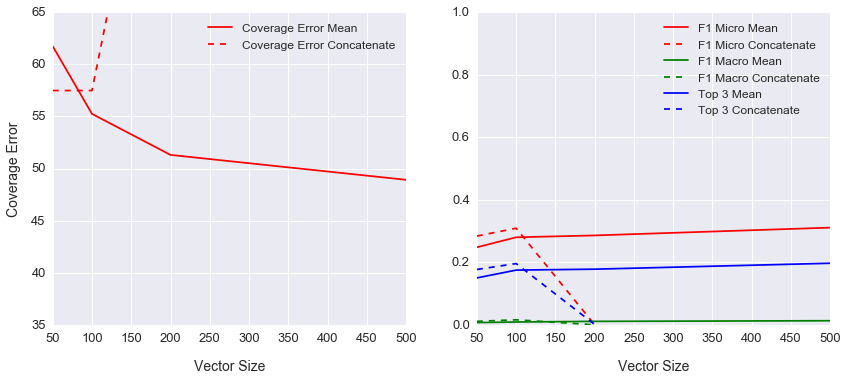

In [185]:
name_1 = 'Mean'
name_2 = 'Concatenate'

fig = plt.figure(figsize=(12,7), dpi=120)
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
fig.subplots_adjust(top=0.72, bottom=0.1, left=0.05, right=0.95)

ax1.set_xlabel("Vector Size", fontsize=X_LABEL_FONT_SIZE, labelpad=X_LABEL_PAD)
ax1.set_ylabel("Coverage Error", fontsize=Y_LABEL_FONT_SIZE, labelpad=Y_LABEL_PAD)
ax1.axis([vector_sizes[0], vector_sizes[-1], SUBCLASSES_LEFT_MIN, SUBCLASSES_LEFT_MAX])
coverage_error_1_line, = ax1.plot(vector_sizes, coverage_errors_1, 'r-', label='Coverage Error {}'.format(name_1))
coverage_error_2_line, = ax1.plot(vector_sizes, coverage_errors_2, 'r--', label='Coverage Error {}'.format(name_2))
ax1.tick_params(labelsize=AXIS_LABELS_FONT_SIZE)


ax2.set_xlabel("Vector Size", fontsize=X_LABEL_FONT_SIZE, labelpad=X_LABEL_PAD)
f1_micro_1_line, = ax2.plot(vector_sizes, f1_micro_1, 'r-', label='F1 Micro {}'.format(name_1))
f1_micro_2_line, = ax2.plot(vector_sizes, f1_micro_2, 'r--', label='F1 Micro {}'.format(name_2))
f1_macro_1_line, = ax2.plot(vector_sizes, f1_macro_1, 'g-', label='F1 Macro {}'.format(name_1))
f1_macro_2_line, = ax2.plot(vector_sizes, f1_macro_2, 'g--', label='F1 Macro {}'.format(name_2))
top_3_1_line, = ax2.plot(vector_sizes, top_3_1, 'b-', label='Top 3 {}'.format(name_1))
top_3_2_line, = ax2.plot(vector_sizes, top_3_2, 'b--', label='Top 3 {}'.format(name_2))
ax2.tick_params(labelsize=AXIS_LABELS_FONT_SIZE)
ax2.set_ylim([SUBCLASSES_RIGHT_MIN, SUBCLASSES_RIGHT_MAX])


ax1.legend(handles=[coverage_error_1_line, coverage_error_2_line], fontsize=LEGEND_FONT_SIZE)
#ax.axis([first_epoch, last_epoch, 0, self.coverage_error_max])

ax2.legend(handles=[f1_micro_1_line, f1_micro_2_line, 
                    f1_macro_1_line, f1_macro_2_line, 
                    top_3_1_line, top_3_2_line],
           bbox_to_anchor=(1, 1), fontsize=LEGEND_FONT_SIZE)

## Vector Size PV-DM Mean vs PV-DM Conc vs PV-DBOW

### Sections

In [268]:
vector_sizes =         [50,    100,   200,   500,   1000]

coverage_errors_1 =      [1.9,   1.911, 1.757, 1.791, 1.747]
coverage_errors_2 =      [1.856, 1.894, 1.847, 1.842, 1.949]
coverage_errors_3 =      [1.897, 1.895, 3.503, None, None]

f1_micro_1 =          [0.581, 0.57,  0.616, 0.603, 0.616]
f1_micro_2 =          [0.577, 0.577, 0.597, 0.595, 0.568]
f1_micro_3 =          [0.574, 0.581, 0.243, None, None]

f1_macro_1 =          [0.492, 0.485, 0.52,  0.513, 0.523]
f1_macro_2 =          [0.485, 0.486, 0.501, 0.501, 0.482]
f1_macro_3 =          [0.484, 0.489, 0.194, None, None]

top_3_1 =             [0.895, 0.892, 0.922, 0.916, 0.924]
top_3_2 =             [0.904, 0.895, 0.906, 0.906, 0.886]
top_3_3 =             [0.896, 0.897, 0.645, None, None]

In [269]:
AXIS_LABELS_FONT_SIZE = 13
X_LABEL_PAD = 15
Y_LABEL_PAD = 10
X_LABEL_FONT_SIZE = 14
Y_LABEL_FONT_SIZE = 14
LEGEND_FONT_SIZE = 12

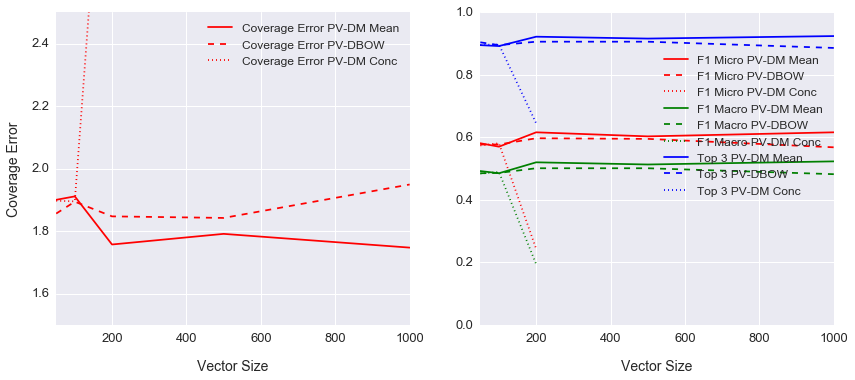

In [270]:
name_1 = 'PV-DM Mean'
name_2 = 'PV-DBOW'
name_3 = 'PV-DM Conc'

fig = plt.figure(figsize=(12,7), dpi=120)
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
# fig.suptitle('sdfsdf')
fig.subplots_adjust(top=0.72, bottom=0.1, left=0.05, right=0.95)

ax1.set_xlabel("Vector Size", fontsize=X_LABEL_FONT_SIZE, labelpad=X_LABEL_PAD)
ax1.set_ylabel("Coverage Error", fontsize=Y_LABEL_FONT_SIZE, labelpad=Y_LABEL_PAD)
ax1.axis([vector_sizes[0], vector_sizes[-1], SECTIONS_LEFT_MIN, SECTIONS_LEFT_MAX])
coverage_error_1_line, = ax1.plot(vector_sizes, coverage_errors_1, 'r-', label='Coverage Error {}'.format(name_1))
coverage_error_2_line, = ax1.plot(vector_sizes, coverage_errors_2, 'r--', label='Coverage Error {}'.format(name_2))
coverage_error_3_line, = ax1.plot(vector_sizes, coverage_errors_3, 'r:', label='Coverage Error {}'.format(name_3))
ax1.tick_params(labelsize=AXIS_LABELS_FONT_SIZE)


ax2.set_xlabel("Vector Size", fontsize=X_LABEL_FONT_SIZE, labelpad=X_LABEL_PAD)
ax2.axis([vector_sizes[0], vector_sizes[-1], SECTIONS_RIGHT_MIN, SECTIONS_RIGHT_MAX])
f1_micro_1_line, = ax2.plot(vector_sizes, f1_micro_1, 'r-', label='F1 Micro {}'.format(name_1))
f1_micro_2_line, = ax2.plot(vector_sizes, f1_micro_2, 'r--', label='F1 Micro {}'.format(name_2))
f1_micro_3_line, = ax2.plot(vector_sizes, f1_micro_3, 'r:', label='F1 Micro {}'.format(name_3))
f1_macro_1_line, = ax2.plot(vector_sizes, f1_macro_1, 'g-', label='F1 Macro {}'.format(name_1))
f1_macro_2_line, = ax2.plot(vector_sizes, f1_macro_2, 'g--', label='F1 Macro {}'.format(name_2))
f1_macro_3_line, = ax2.plot(vector_sizes, f1_macro_3, 'g:', label='F1 Macro {}'.format(name_3))
top_3_1_line, = ax2.plot(vector_sizes, top_3_1, 'b-', label='Top 3 {}'.format(name_1))
top_3_2_line, = ax2.plot(vector_sizes, top_3_2, 'b--', label='Top 3 {}'.format(name_2))
top_3_3_line, = ax2.plot(vector_sizes, top_3_3, 'b:', label='Top 3 {}'.format(name_3))
ax2.tick_params(labelsize=AXIS_LABELS_FONT_SIZE)


ax1.legend(handles=[coverage_error_1_line, coverage_error_2_line, coverage_error_3_line], fontsize=LEGEND_FONT_SIZE)
#ax.axis([first_epoch, last_epoch, 0, self.coverage_error_max])

ax2.legend(handles=[f1_micro_1_line, f1_micro_2_line, f1_micro_3_line, 
                    f1_macro_1_line, f1_macro_2_line, f1_macro_3_line,
                    top_3_1_line, top_3_2_line, top_3_3_line], 
           bbox_to_anchor=(1, 0.9), fontsize=LEGEND_FONT_SIZE)

### Classes

In [262]:
vector_sizes =         [50,    100,   200,   500,   1000]

coverage_errors_1 =      [14.70, 14.16, 13.58, 12.95, 13.62]
coverage_errors_2 =      [14.53, 13.17, 12.63, 12.53, 15.14]
coverage_errors_3 =      [11.82, 11.10, 24.82, None, None]

f1_micro_1 =          [0.446, 0.465, 0.475, 0.497, 0.5]
f1_micro_2 =          [0.408, 0.429, 0.465, 0.512, 0.518]
f1_micro_3 =          [0.469, 0.478, 0.000, None, None]

f1_macro_1 =          [0.022, 0.027, 0.031, 0.034, 0.034]
f1_macro_2 =          [0.020, 0.025, 0.031, 0.050, 0.063]
f1_macro_3 =          [0.030, 0.038, 0.000, None, None]

top_3_1 =             [0.609, 0.597, 0.655, 0.662, 0.648]
top_3_2 =             [0.613, 0.633, 0.637, 0.593, 0.563]
top_3_3 =             [0.621, 0.631, 0.170, None, None]

In [263]:
AXIS_LABELS_FONT_SIZE = 13
X_LABEL_PAD = 15
Y_LABEL_PAD = 10
X_LABEL_FONT_SIZE = 14
Y_LABEL_FONT_SIZE = 14
LEGEND_FONT_SIZE = 12

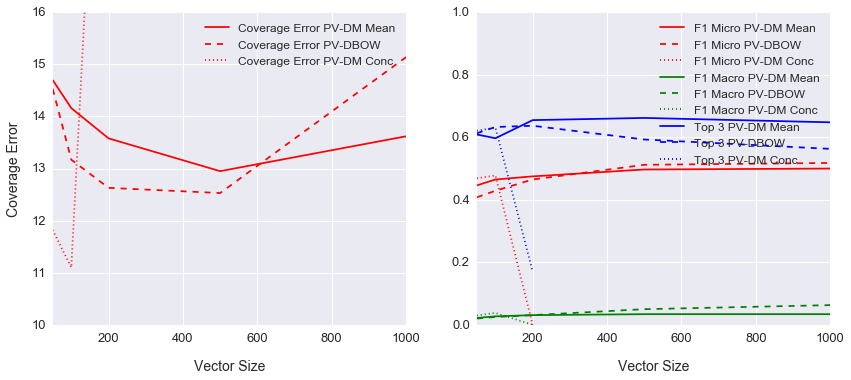

In [264]:
name_1 = 'PV-DM Mean'
name_2 = 'PV-DBOW'
name_3 = 'PV-DM Conc'

fig = plt.figure(figsize=(12,7), dpi=120)
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
# fig.suptitle('sdfsdf')
fig.subplots_adjust(top=0.72, bottom=0.1, left=0.05, right=0.95)

ax1.set_xlabel("Vector Size", fontsize=X_LABEL_FONT_SIZE, labelpad=X_LABEL_PAD)
ax1.set_ylabel("Coverage Error", fontsize=Y_LABEL_FONT_SIZE, labelpad=Y_LABEL_PAD)
ax1.axis([vector_sizes[0], vector_sizes[-1], CLASSES_LEFT_MIN, CLASSES_LEFT_MAX])
coverage_error_1_line, = ax1.plot(vector_sizes, coverage_errors_1, 'r-', label='Coverage Error {}'.format(name_1))
coverage_error_2_line, = ax1.plot(vector_sizes, coverage_errors_2, 'r--', label='Coverage Error {}'.format(name_2))
coverage_error_3_line, = ax1.plot(vector_sizes, coverage_errors_3, 'r:', label='Coverage Error {}'.format(name_3))
ax1.tick_params(labelsize=AXIS_LABELS_FONT_SIZE)


ax2.set_xlabel("Vector Size", fontsize=X_LABEL_FONT_SIZE, labelpad=X_LABEL_PAD)
ax2.axis([vector_sizes[0], vector_sizes[-1], CLASSES_RIGHT_MIN, CLASSES_RIGHT_MAX])
f1_micro_1_line, = ax2.plot(vector_sizes, f1_micro_1, 'r-', label='F1 Micro {}'.format(name_1))
f1_micro_2_line, = ax2.plot(vector_sizes, f1_micro_2, 'r--', label='F1 Micro {}'.format(name_2))
f1_micro_3_line, = ax2.plot(vector_sizes, f1_micro_3, 'r:', label='F1 Micro {}'.format(name_3))
f1_macro_1_line, = ax2.plot(vector_sizes, f1_macro_1, 'g-', label='F1 Macro {}'.format(name_1))
f1_macro_2_line, = ax2.plot(vector_sizes, f1_macro_2, 'g--', label='F1 Macro {}'.format(name_2))
f1_macro_3_line, = ax2.plot(vector_sizes, f1_macro_3, 'g:', label='F1 Macro {}'.format(name_3))
top_3_1_line, = ax2.plot(vector_sizes, top_3_1, 'b-', label='Top 3 {}'.format(name_1))
top_3_2_line, = ax2.plot(vector_sizes, top_3_2, 'b--', label='Top 3 {}'.format(name_2))
top_3_3_line, = ax2.plot(vector_sizes, top_3_3, 'b:', label='Top 3 {}'.format(name_3))
ax2.tick_params(labelsize=AXIS_LABELS_FONT_SIZE)


ax1.legend(handles=[coverage_error_1_line, coverage_error_2_line, coverage_error_3_line], fontsize=LEGEND_FONT_SIZE)
#ax.axis([first_epoch, last_epoch, 0, self.coverage_error_max])

ax2.legend(handles=[f1_micro_1_line, f1_micro_2_line, f1_micro_3_line, 
                    f1_macro_1_line, f1_macro_2_line, f1_macro_3_line,
                    top_3_1_line, top_3_2_line, top_3_3_line], 
           bbox_to_anchor=(1, 1), fontsize=LEGEND_FONT_SIZE)

### Subclasses

In [265]:
vector_sizes =         [50,    100,   200,   500,   1000]

coverage_errors_1 =      [61.75,   55.25, 51.31, 48.92, 49.75]
coverage_errors_2 =      [60.20, 56.41, 47.43, 39.98, 45.62]
coverage_errors_3 =      [57.49, 57.49, 94.76, None, None]

f1_micro_1 =          [0.248, 0.280,  0.286, 0.311, 0.314]
f1_micro_2 =          [0.234, 0.248, 0.291, 0.345, 0.362]
f1_micro_3 =          [0.284, 0.309, 0.000, None, None]

f1_macro_1 =          [0.007, 0.009, 0.011,  0.013, 0.013]
f1_macro_2 =          [0.007, 0.009, 0.012, 0.023, 0.034]
f1_macro_3 =          [0.011, 0.016, 0.000, None, None]

top_3_1 =             [0.150, 0.175, 0.178, 0.197, 0.200]
top_3_2 =             [0.140, 0.150, 0.182, 0.232, 0.255]
top_3_3 =             [0.177, 0.196, 0.001, None, None]

In [266]:
AXIS_LABELS_FONT_SIZE = 13
X_LABEL_PAD = 15
Y_LABEL_PAD = 10
X_LABEL_FONT_SIZE = 14
Y_LABEL_FONT_SIZE = 14
LEGEND_FONT_SIZE = 12

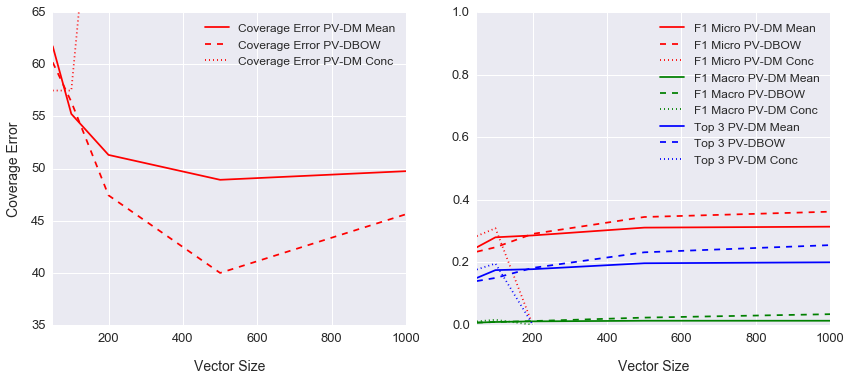

In [267]:
name_1 = 'PV-DM Mean'
name_2 = 'PV-DBOW'
name_3 = 'PV-DM Conc'

fig = plt.figure(figsize=(12,7), dpi=120)
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
# fig.suptitle('sdfsdf')
fig.subplots_adjust(top=0.72, bottom=0.1, left=0.05, right=0.95)

ax1.set_xlabel("Vector Size", fontsize=X_LABEL_FONT_SIZE, labelpad=X_LABEL_PAD)
ax1.set_ylabel("Coverage Error", fontsize=Y_LABEL_FONT_SIZE, labelpad=Y_LABEL_PAD)
ax1.axis([vector_sizes[0], vector_sizes[-1], SUBCLASSES_LEFT_MIN, SUBCLASSES_LEFT_MAX])
coverage_error_1_line, = ax1.plot(vector_sizes, coverage_errors_1, 'r-', label='Coverage Error {}'.format(name_1))
coverage_error_2_line, = ax1.plot(vector_sizes, coverage_errors_2, 'r--', label='Coverage Error {}'.format(name_2))
coverage_error_3_line, = ax1.plot(vector_sizes, coverage_errors_3, 'r:', label='Coverage Error {}'.format(name_3))
ax1.tick_params(labelsize=AXIS_LABELS_FONT_SIZE)


ax2.set_xlabel("Vector Size", fontsize=X_LABEL_FONT_SIZE, labelpad=X_LABEL_PAD)
ax2.axis([vector_sizes[0], vector_sizes[-1], SUBCLASSES_RIGHT_MIN, SUBCLASSES_RIGHT_MAX])
f1_micro_1_line, = ax2.plot(vector_sizes, f1_micro_1, 'r-', label='F1 Micro {}'.format(name_1))
f1_micro_2_line, = ax2.plot(vector_sizes, f1_micro_2, 'r--', label='F1 Micro {}'.format(name_2))
f1_micro_3_line, = ax2.plot(vector_sizes, f1_micro_3, 'r:', label='F1 Micro {}'.format(name_3))
f1_macro_1_line, = ax2.plot(vector_sizes, f1_macro_1, 'g-', label='F1 Macro {}'.format(name_1))
f1_macro_2_line, = ax2.plot(vector_sizes, f1_macro_2, 'g--', label='F1 Macro {}'.format(name_2))
f1_macro_3_line, = ax2.plot(vector_sizes, f1_macro_3, 'g:', label='F1 Macro {}'.format(name_3))
top_3_1_line, = ax2.plot(vector_sizes, top_3_1, 'b-', label='Top 3 {}'.format(name_1))
top_3_2_line, = ax2.plot(vector_sizes, top_3_2, 'b--', label='Top 3 {}'.format(name_2))
top_3_3_line, = ax2.plot(vector_sizes, top_3_3, 'b:', label='Top 3 {}'.format(name_3))
ax2.tick_params(labelsize=AXIS_LABELS_FONT_SIZE)


ax1.legend(handles=[coverage_error_1_line, coverage_error_2_line, coverage_error_3_line], fontsize=LEGEND_FONT_SIZE)
#ax.axis([first_epoch, last_epoch, 0, self.coverage_error_max])

ax2.legend(handles=[f1_micro_1_line, f1_micro_2_line, f1_micro_3_line, 
                    f1_macro_1_line, f1_macro_2_line, f1_macro_3_line,
                    top_3_1_line, top_3_2_line, top_3_3_line], 
           bbox_to_anchor=(1, 1), fontsize=LEGEND_FONT_SIZE)

## PV-DM Mean Window Sizes

### Sections

In [186]:
vector_sizes = [2,4,8]

coverage_errors_1 = [1.797, 1.798, 1.757]

f1_micro_1 = [0.608, 0.615, 0.616]

f1_macro_1 = [0.513, 0.518, 0.52]

top_3_1 = [0.914, 0.915, 0.922]


In [187]:
AXIS_LABELS_FONT_SIZE = 13
X_LABEL_PAD = 15
Y_LABEL_PAD = 10
X_LABEL_FONT_SIZE = 14
Y_LABEL_FONT_SIZE = 14
LEGEND_FONT_SIZE = 12

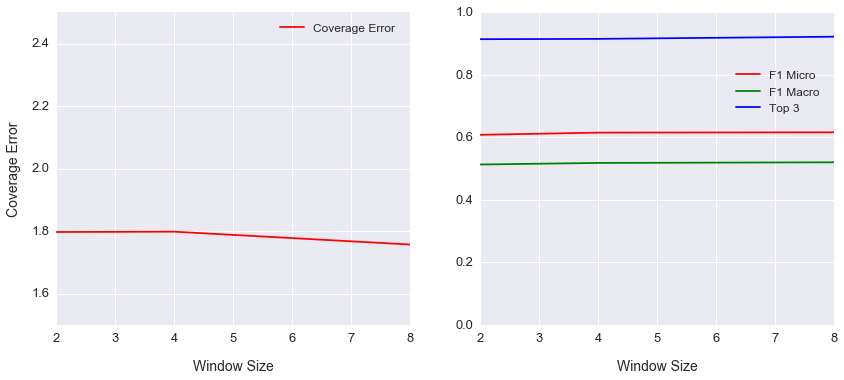

In [189]:
name_1 = ''

fig = plt.figure(figsize=(12,7), dpi=120)
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
fig.subplots_adjust(top=0.72, bottom=0.1, left=0.05, right=0.95)

ax1.set_xlabel("Window Size", fontsize=X_LABEL_FONT_SIZE, labelpad=X_LABEL_PAD)
ax1.set_ylabel("Coverage Error", fontsize=Y_LABEL_FONT_SIZE, labelpad=Y_LABEL_PAD)
ax1.axis([vector_sizes[0], vector_sizes[-1], SECTIONS_LEFT_MIN, SECTIONS_LEFT_MAX])
coverage_error_1_line, = ax1.plot(vector_sizes, coverage_errors_1, 'r-', label='Coverage Error {}'.format(name_1))
ax1.tick_params(labelsize=AXIS_LABELS_FONT_SIZE)


ax2.set_xlabel("Window Size", fontsize=X_LABEL_FONT_SIZE, labelpad=X_LABEL_PAD)
f1_micro_1_line, = ax2.plot(vector_sizes, f1_micro_1, 'r-', label='F1 Micro {}'.format(name_1))
f1_macro_1_line, = ax2.plot(vector_sizes, f1_macro_1, 'g-', label='F1 Macro {}'.format(name_1))
top_3_1_line, = ax2.plot(vector_sizes, top_3_1, 'b-', label='Top 3 {}'.format(name_1))
ax2.tick_params(labelsize=AXIS_LABELS_FONT_SIZE)
ax2.set_ylim([SECTIONS_RIGHT_MIN, SECTIONS_RIGHT_MAX])


ax1.legend(handles=[coverage_error_1_line], fontsize=LEGEND_FONT_SIZE)
#ax.axis([first_epoch, last_epoch, 0, self.coverage_error_max])

ax2.legend(handles=[f1_micro_1_line, 
                    f1_macro_1_line, 
                    top_3_1_line],
           bbox_to_anchor=(1, 0.85), fontsize=LEGEND_FONT_SIZE)

### Classes

In [192]:
vector_sizes = [2,4,8]

coverage_errors_1 = [13.16, 14.54, 13.58]

f1_micro_1 = [0.486, 0.477, 0.475]

f1_macro_1 = [0.033, 0.031, 0.031]

top_3_1 = [0.661, 0.611, 0.655]


In [193]:
AXIS_LABELS_FONT_SIZE = 13
X_LABEL_PAD = 15
Y_LABEL_PAD = 10
X_LABEL_FONT_SIZE = 14
Y_LABEL_FONT_SIZE = 14
LEGEND_FONT_SIZE = 12

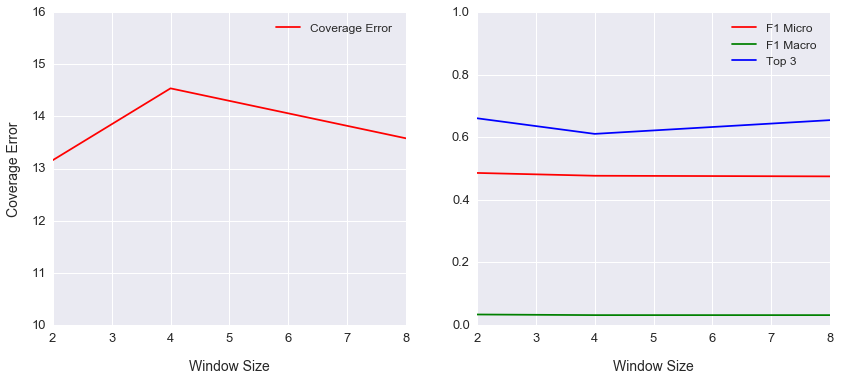

In [196]:
name_1 = ''

fig = plt.figure(figsize=(12,7), dpi=120)
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
fig.subplots_adjust(top=0.72, bottom=0.1, left=0.05, right=0.95)

ax1.set_xlabel("Window Size", fontsize=X_LABEL_FONT_SIZE, labelpad=X_LABEL_PAD)
ax1.set_ylabel("Coverage Error", fontsize=Y_LABEL_FONT_SIZE, labelpad=Y_LABEL_PAD)
ax1.axis([vector_sizes[0], vector_sizes[-1], CLASSES_LEFT_MIN, CLASSES_LEFT_MAX])
coverage_error_1_line, = ax1.plot(vector_sizes, coverage_errors_1, 'r-', label='Coverage Error {}'.format(name_1))
ax1.tick_params(labelsize=AXIS_LABELS_FONT_SIZE)


ax2.set_xlabel("Window Size", fontsize=X_LABEL_FONT_SIZE, labelpad=X_LABEL_PAD)
f1_micro_1_line, = ax2.plot(vector_sizes, f1_micro_1, 'r-', label='F1 Micro {}'.format(name_1))
f1_macro_1_line, = ax2.plot(vector_sizes, f1_macro_1, 'g-', label='F1 Macro {}'.format(name_1))
top_3_1_line, = ax2.plot(vector_sizes, top_3_1, 'b-', label='Top 3 {}'.format(name_1))
ax2.tick_params(labelsize=AXIS_LABELS_FONT_SIZE)
ax2.set_ylim([CLASSES_RIGHT_MIN, CLASSES_RIGHT_MAX])


ax1.legend(handles=[coverage_error_1_line], fontsize=LEGEND_FONT_SIZE)
#ax.axis([first_epoch, last_epoch, 0, self.coverage_error_max])

ax2.legend(handles=[f1_micro_1_line, 
                    f1_macro_1_line, 
                    top_3_1_line],
           bbox_to_anchor=(1, 1), fontsize=LEGEND_FONT_SIZE)

### Subclasses

In [197]:
vector_sizes = [2,4,8]

coverage_errors_1 = [48.13, 50.44, 51.31]

f1_micro_1 = [0.302, 0.288, 0.286]

f1_macro_1 = [0.012, 0.010, 0.01013]

top_3_1 = [0.189, 0.180, 0.178]


In [198]:
AXIS_LABELS_FONT_SIZE = 13
X_LABEL_PAD = 15
Y_LABEL_PAD = 10
X_LABEL_FONT_SIZE = 14
Y_LABEL_FONT_SIZE = 14
LEGEND_FONT_SIZE = 12

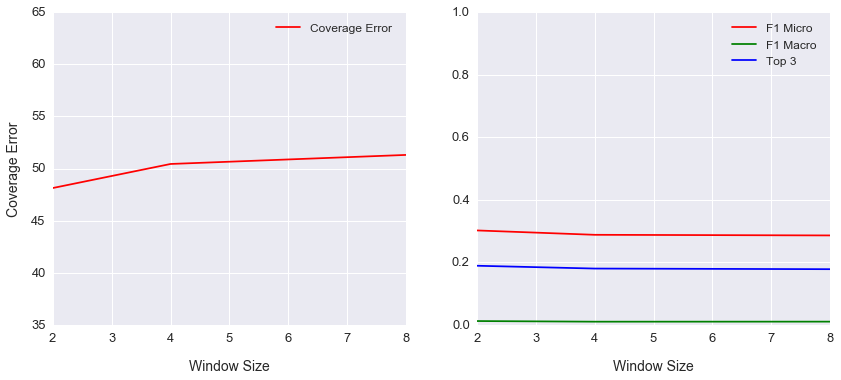

In [200]:
name_1 = ''

fig = plt.figure(figsize=(12,7), dpi=120)
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
fig.subplots_adjust(top=0.72, bottom=0.1, left=0.05, right=0.95)

ax1.set_xlabel("Window Size", fontsize=X_LABEL_FONT_SIZE, labelpad=X_LABEL_PAD)
ax1.set_ylabel("Coverage Error", fontsize=Y_LABEL_FONT_SIZE, labelpad=Y_LABEL_PAD)
ax1.axis([vector_sizes[0], vector_sizes[-1], SUBCLASSES_LEFT_MIN, SUBCLASSES_LEFT_MAX])
coverage_error_1_line, = ax1.plot(vector_sizes, coverage_errors_1, 'r-', label='Coverage Error {}'.format(name_1))
ax1.tick_params(labelsize=AXIS_LABELS_FONT_SIZE)


ax2.set_xlabel("Window Size", fontsize=X_LABEL_FONT_SIZE, labelpad=X_LABEL_PAD)
f1_micro_1_line, = ax2.plot(vector_sizes, f1_micro_1, 'r-', label='F1 Micro {}'.format(name_1))
f1_macro_1_line, = ax2.plot(vector_sizes, f1_macro_1, 'g-', label='F1 Macro {}'.format(name_1))
top_3_1_line, = ax2.plot(vector_sizes, top_3_1, 'b-', label='Top 3 {}'.format(name_1))
ax2.tick_params(labelsize=AXIS_LABELS_FONT_SIZE)
ax2.set_ylim([SUBCLASSES_RIGHT_MIN, SUBCLASSES_RIGHT_MAX])


ax1.legend(handles=[coverage_error_1_line], fontsize=LEGEND_FONT_SIZE)
#ax.axis([first_epoch, last_epoch, 0, self.coverage_error_max])

ax2.legend(handles=[f1_micro_1_line, 
                    f1_macro_1_line, 
                    top_3_1_line],
           bbox_to_anchor=(1, 1), fontsize=LEGEND_FONT_SIZE)

## PV-DM Concatenate Window Size

### Sections

In [201]:
vector_sizes =      [2,     5,     8]

coverage_errors_1 = [1.867, 1.810, 1.895]

f1_micro_1 =        [0.586, 0.602, 0.581]

f1_macro_1 =        [0.496, 0.506, 0.489]

top_3_1 =           [0.902, 0.913, 0.897]


In [202]:
AXIS_LABELS_FONT_SIZE = 13
X_LABEL_PAD = 15
Y_LABEL_PAD = 10
X_LABEL_FONT_SIZE = 14
Y_LABEL_FONT_SIZE = 14
LEGEND_FONT_SIZE = 12

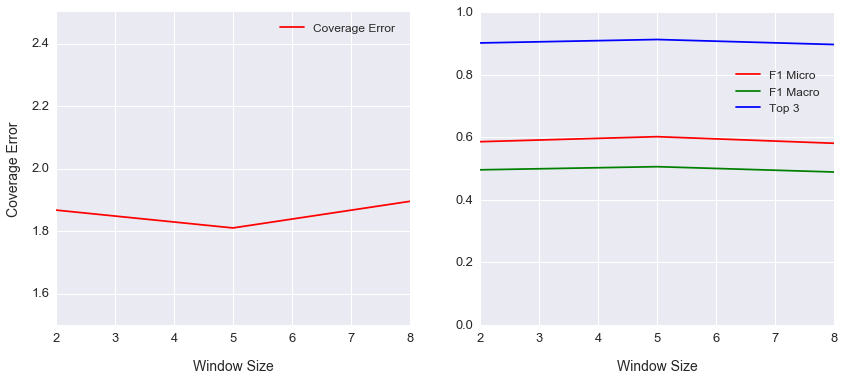

In [205]:
name_1 = ''

fig = plt.figure(figsize=(12,7), dpi=120)
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
fig.subplots_adjust(top=0.72, bottom=0.1, left=0.05, right=0.95)

ax1.set_xlabel("Window Size", fontsize=X_LABEL_FONT_SIZE, labelpad=X_LABEL_PAD)
ax1.set_ylabel("Coverage Error", fontsize=Y_LABEL_FONT_SIZE, labelpad=Y_LABEL_PAD)
ax1.axis([vector_sizes[0], vector_sizes[-1], SECTIONS_LEFT_MIN, SECTIONS_LEFT_MAX])
coverage_error_1_line, = ax1.plot(vector_sizes, coverage_errors_1, 'r-', label='Coverage Error {}'.format(name_1))
ax1.tick_params(labelsize=AXIS_LABELS_FONT_SIZE)


ax2.set_xlabel("Window Size", fontsize=X_LABEL_FONT_SIZE, labelpad=X_LABEL_PAD)
f1_micro_1_line, = ax2.plot(vector_sizes, f1_micro_1, 'r-', label='F1 Micro {}'.format(name_1))
f1_macro_1_line, = ax2.plot(vector_sizes, f1_macro_1, 'g-', label='F1 Macro {}'.format(name_1))
top_3_1_line, = ax2.plot(vector_sizes, top_3_1, 'b-', label='Top 3 {}'.format(name_1))
ax2.tick_params(labelsize=AXIS_LABELS_FONT_SIZE)
ax2.set_ylim([SECTIONS_RIGHT_MIN, SECTIONS_RIGHT_MAX])


ax1.legend(handles=[coverage_error_1_line], fontsize=LEGEND_FONT_SIZE)
#ax.axis([first_epoch, last_epoch, 0, self.coverage_error_max])

ax2.legend(handles=[f1_micro_1_line, 
                    f1_macro_1_line, 
                    top_3_1_line],
                  bbox_to_anchor=(1, 0.85), fontsize=LEGEND_FONT_SIZE)

### Classes

In [206]:
vector_sizes =      [2,     5,     8]

coverage_errors_1 = [11.30, 10.52, 11.10]

f1_micro_1 =        [0.473, 0.489, 0.478]

f1_macro_1 =        [0.034, 0.041, 0.038]

top_3_1 =           [0.646, 0.651, 0.631]


In [207]:
AXIS_LABELS_FONT_SIZE = 13
X_LABEL_PAD = 15
Y_LABEL_PAD = 10
X_LABEL_FONT_SIZE = 14
Y_LABEL_FONT_SIZE = 14
LEGEND_FONT_SIZE = 12

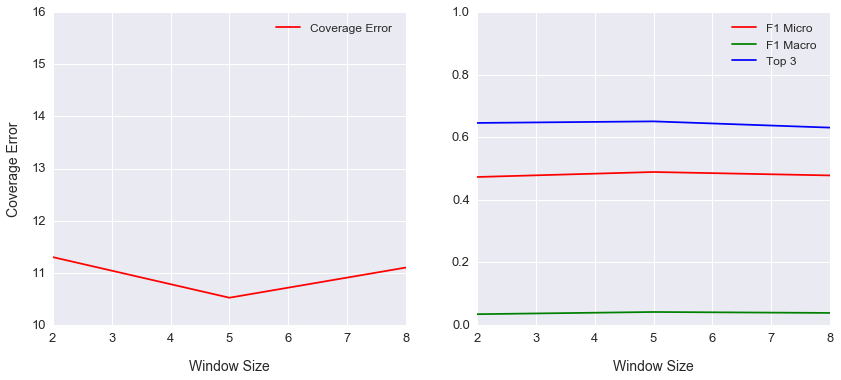

In [208]:
name_1 = ''

fig = plt.figure(figsize=(12,7), dpi=120)
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
fig.subplots_adjust(top=0.72, bottom=0.1, left=0.05, right=0.95)

ax1.set_xlabel("Window Size", fontsize=X_LABEL_FONT_SIZE, labelpad=X_LABEL_PAD)
ax1.set_ylabel("Coverage Error", fontsize=Y_LABEL_FONT_SIZE, labelpad=Y_LABEL_PAD)
ax1.axis([vector_sizes[0], vector_sizes[-1], CLASSES_LEFT_MIN, CLASSES_LEFT_MAX])
coverage_error_1_line, = ax1.plot(vector_sizes, coverage_errors_1, 'r-', label='Coverage Error {}'.format(name_1))
ax1.tick_params(labelsize=AXIS_LABELS_FONT_SIZE)


ax2.set_xlabel("Window Size", fontsize=X_LABEL_FONT_SIZE, labelpad=X_LABEL_PAD)
f1_micro_1_line, = ax2.plot(vector_sizes, f1_micro_1, 'r-', label='F1 Micro {}'.format(name_1))
f1_macro_1_line, = ax2.plot(vector_sizes, f1_macro_1, 'g-', label='F1 Macro {}'.format(name_1))
top_3_1_line, = ax2.plot(vector_sizes, top_3_1, 'b-', label='Top 3 {}'.format(name_1))
ax2.tick_params(labelsize=AXIS_LABELS_FONT_SIZE)
ax2.set_ylim([CLASSES_RIGHT_MIN, CLASSES_RIGHT_MAX])


ax1.legend(handles=[coverage_error_1_line], fontsize=LEGEND_FONT_SIZE)
#ax.axis([first_epoch, last_epoch, 0, self.coverage_error_max])

ax2.legend(handles=[f1_micro_1_line, 
                    f1_macro_1_line, 
                    top_3_1_line],
           bbox_to_anchor=(1, 1), fontsize=LEGEND_FONT_SIZE)

### Subclasses

In [211]:
vector_sizes =      [2,     5,     8]

coverage_errors_1 = [55.49, 55.79, 55.34]

f1_micro_1 =        [0.284, 0.297, 0.311]

f1_macro_1 =        [0.014, 0.016, 0.016]

top_3_1 =           [0.186, 0.198, 0.196]


In [212]:
AXIS_LABELS_FONT_SIZE = 13
X_LABEL_PAD = 15
Y_LABEL_PAD = 10
X_LABEL_FONT_SIZE = 14
Y_LABEL_FONT_SIZE = 14
LEGEND_FONT_SIZE = 12

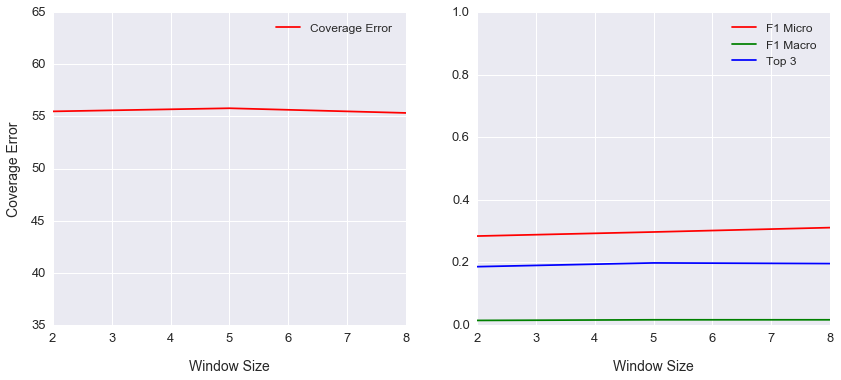

In [213]:
name_1 = ''

fig = plt.figure(figsize=(12,7), dpi=120)
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
fig.subplots_adjust(top=0.72, bottom=0.1, left=0.05, right=0.95)

ax1.set_xlabel("Window Size", fontsize=X_LABEL_FONT_SIZE, labelpad=X_LABEL_PAD)
ax1.set_ylabel("Coverage Error", fontsize=Y_LABEL_FONT_SIZE, labelpad=Y_LABEL_PAD)
ax1.axis([vector_sizes[0], vector_sizes[-1], SUBCLASSES_LEFT_MIN, SUBCLASSES_LEFT_MAX])
coverage_error_1_line, = ax1.plot(vector_sizes, coverage_errors_1, 'r-', label='Coverage Error {}'.format(name_1))
ax1.tick_params(labelsize=AXIS_LABELS_FONT_SIZE)


ax2.set_xlabel("Window Size", fontsize=X_LABEL_FONT_SIZE, labelpad=X_LABEL_PAD)
f1_micro_1_line, = ax2.plot(vector_sizes, f1_micro_1, 'r-', label='F1 Micro {}'.format(name_1))
f1_macro_1_line, = ax2.plot(vector_sizes, f1_macro_1, 'g-', label='F1 Macro {}'.format(name_1))
top_3_1_line, = ax2.plot(vector_sizes, top_3_1, 'b-', label='Top 3 {}'.format(name_1))
ax2.tick_params(labelsize=AXIS_LABELS_FONT_SIZE)
ax2.set_ylim([SUBCLASSES_RIGHT_MIN, SUBCLASSES_RIGHT_MAX])


ax1.legend(handles=[coverage_error_1_line], fontsize=LEGEND_FONT_SIZE)
#ax.axis([first_epoch, last_epoch, 0, self.coverage_error_max])

ax2.legend(handles=[f1_micro_1_line, 
                    f1_macro_1_line, 
                    top_3_1_line],
                  bbox_to_anchor=(1, 1), fontsize=LEGEND_FONT_SIZE)

## PV-DBOW Window Size

### Sections

In [214]:
vector_sizes =      [2,     4,     8]

coverage_errors_1 = [1.849, 1.830, 1.839]

f1_micro_1 =        [0.593, 0.599, 0.597]

f1_macro_1 =        [0.497, 0.502, 0.501]

top_3_1 =           [0.905, 0.909, 0.906]


In [215]:
AXIS_LABELS_FONT_SIZE = 13
X_LABEL_PAD = 15
Y_LABEL_PAD = 10
X_LABEL_FONT_SIZE = 14
Y_LABEL_FONT_SIZE = 14
LEGEND_FONT_SIZE = 12

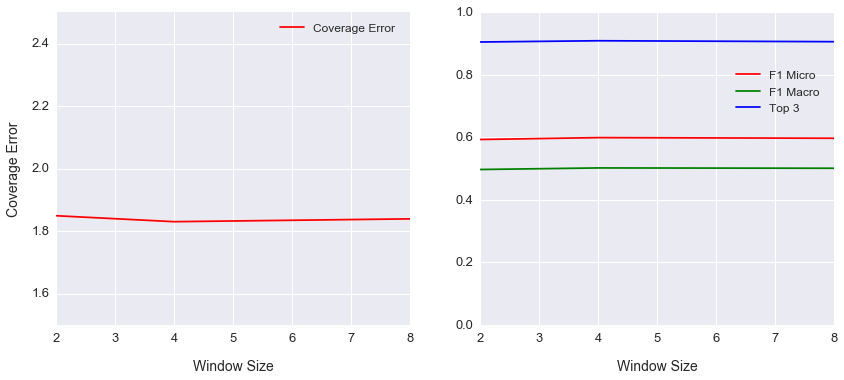

In [217]:
name_1 = ''

fig = plt.figure(figsize=(12,7), dpi=120)
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
fig.subplots_adjust(top=0.72, bottom=0.1, left=0.05, right=0.95)

ax1.set_xlabel("Window Size", fontsize=X_LABEL_FONT_SIZE, labelpad=X_LABEL_PAD)
ax1.set_ylabel("Coverage Error", fontsize=Y_LABEL_FONT_SIZE, labelpad=Y_LABEL_PAD)
ax1.axis([vector_sizes[0], vector_sizes[-1], SECTIONS_LEFT_MIN, SECTIONS_LEFT_MAX])
coverage_error_1_line, = ax1.plot(vector_sizes, coverage_errors_1, 'r-', label='Coverage Error {}'.format(name_1))
ax1.tick_params(labelsize=AXIS_LABELS_FONT_SIZE)


ax2.set_xlabel("Window Size", fontsize=X_LABEL_FONT_SIZE, labelpad=X_LABEL_PAD)
f1_micro_1_line, = ax2.plot(vector_sizes, f1_micro_1, 'r-', label='F1 Micro {}'.format(name_1))
f1_macro_1_line, = ax2.plot(vector_sizes, f1_macro_1, 'g-', label='F1 Macro {}'.format(name_1))
top_3_1_line, = ax2.plot(vector_sizes, top_3_1, 'b-', label='Top 3 {}'.format(name_1))
ax2.tick_params(labelsize=AXIS_LABELS_FONT_SIZE)
ax2.set_ylim([SECTIONS_RIGHT_MIN, SECTIONS_RIGHT_MAX])


ax1.legend(handles=[coverage_error_1_line], fontsize=LEGEND_FONT_SIZE, bbox_to_anchor=(1, 1))
#ax.axis([first_epoch, last_epoch, 0, self.coverage_error_max])

ax2.legend(handles=[f1_micro_1_line, 
                    f1_macro_1_line, 
                    top_3_1_line],
           bbox_to_anchor=(1, 0.85), fontsize=LEGEND_FONT_SIZE)

### Classes

In [218]:
vector_sizes =      [2,     4,     8]

coverage_errors_1 = [12.53, 12.54, 12.63]

f1_micro_1 =        [0.463, 0.468, 0.465]

f1_macro_1 =        [0.031, 0.032, 0.031]

top_3_1 =           [0.640, 0.641, 0.637]


In [219]:
AXIS_LABELS_FONT_SIZE = 13
X_LABEL_PAD = 15
Y_LABEL_PAD = 10
X_LABEL_FONT_SIZE = 14
Y_LABEL_FONT_SIZE = 14
LEGEND_FONT_SIZE = 12

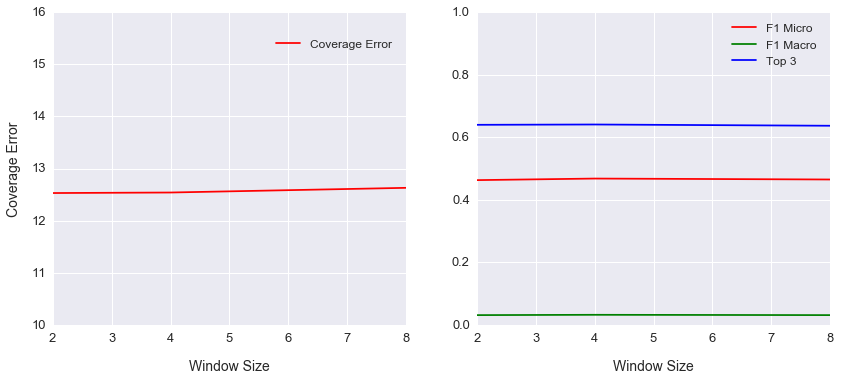

In [220]:
name_1 = ''

fig = plt.figure(figsize=(12,7), dpi=120)
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
fig.subplots_adjust(top=0.72, bottom=0.1, left=0.05, right=0.95)

ax1.set_xlabel("Window Size", fontsize=X_LABEL_FONT_SIZE, labelpad=X_LABEL_PAD)
ax1.set_ylabel("Coverage Error", fontsize=Y_LABEL_FONT_SIZE, labelpad=Y_LABEL_PAD)
ax1.axis([vector_sizes[0], vector_sizes[-1], CLASSES_LEFT_MIN, CLASSES_LEFT_MAX])
coverage_error_1_line, = ax1.plot(vector_sizes, coverage_errors_1, 'r-', label='Coverage Error {}'.format(name_1))
ax1.tick_params(labelsize=AXIS_LABELS_FONT_SIZE)


ax2.set_xlabel("Window Size", fontsize=X_LABEL_FONT_SIZE, labelpad=X_LABEL_PAD)
f1_micro_1_line, = ax2.plot(vector_sizes, f1_micro_1, 'r-', label='F1 Micro {}'.format(name_1))
f1_macro_1_line, = ax2.plot(vector_sizes, f1_macro_1, 'g-', label='F1 Macro {}'.format(name_1))
top_3_1_line, = ax2.plot(vector_sizes, top_3_1, 'b-', label='Top 3 {}'.format(name_1))
ax2.tick_params(labelsize=AXIS_LABELS_FONT_SIZE)
ax2.set_ylim([CLASSES_RIGHT_MIN, CLASSES_RIGHT_MAX])


ax1.legend(handles=[coverage_error_1_line], fontsize=LEGEND_FONT_SIZE, bbox_to_anchor=(1, 0.95))
#ax.axis([first_epoch, last_epoch, 0, self.coverage_error_max])

ax2.legend(handles=[f1_micro_1_line, 
                    f1_macro_1_line, 
                    top_3_1_line],
           bbox_to_anchor=(1, 1), fontsize=LEGEND_FONT_SIZE)

### Subclasses

In [223]:
vector_sizes =      [2,     4,     8]

coverage_errors_1 = [48.05, 48.58, 47.43]

f1_micro_1 =        [0.287, 0.288, 0.291]

f1_macro_1 =        [0.012, 0.012, 0.012]

top_3_1 =           [0.178, 0.179, 0.182]


In [224]:
AXIS_LABELS_FONT_SIZE = 13
X_LABEL_PAD = 15
Y_LABEL_PAD = 10
X_LABEL_FONT_SIZE = 14
Y_LABEL_FONT_SIZE = 14
LEGEND_FONT_SIZE = 12

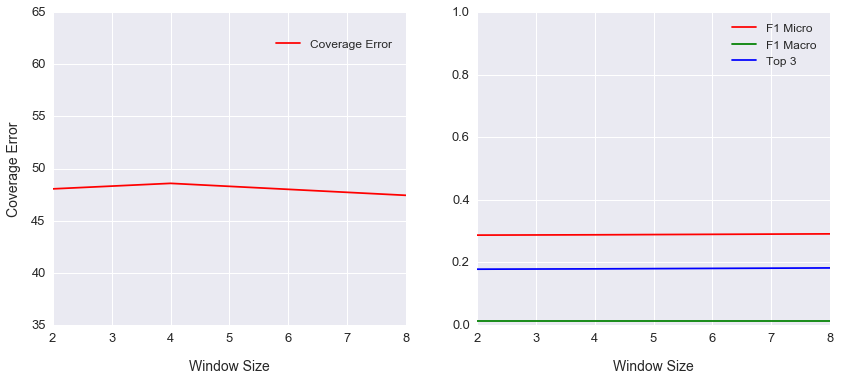

In [226]:
name_1 = ''

fig = plt.figure(figsize=(12,7), dpi=120)
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
fig.subplots_adjust(top=0.72, bottom=0.1, left=0.05, right=0.95)

ax1.set_xlabel("Window Size", fontsize=X_LABEL_FONT_SIZE, labelpad=X_LABEL_PAD)
ax1.set_ylabel("Coverage Error", fontsize=Y_LABEL_FONT_SIZE, labelpad=Y_LABEL_PAD)
ax1.axis([vector_sizes[0], vector_sizes[-1], SUBCLASSES_LEFT_MIN, SUBCLASSES_LEFT_MAX])
coverage_error_1_line, = ax1.plot(vector_sizes, coverage_errors_1, 'r-', label='Coverage Error {}'.format(name_1))
ax1.tick_params(labelsize=AXIS_LABELS_FONT_SIZE)


ax2.set_xlabel("Window Size", fontsize=X_LABEL_FONT_SIZE, labelpad=X_LABEL_PAD)
f1_micro_1_line, = ax2.plot(vector_sizes, f1_micro_1, 'r-', label='F1 Micro {}'.format(name_1))
f1_macro_1_line, = ax2.plot(vector_sizes, f1_macro_1, 'g-', label='F1 Macro {}'.format(name_1))
top_3_1_line, = ax2.plot(vector_sizes, top_3_1, 'b-', label='Top 3 {}'.format(name_1))
ax2.tick_params(labelsize=AXIS_LABELS_FONT_SIZE)
ax2.set_ylim([SUBCLASSES_RIGHT_MIN, SUBCLASSES_RIGHT_MAX])


ax1.legend(handles=[coverage_error_1_line], fontsize=LEGEND_FONT_SIZE, bbox_to_anchor=(1, 0.95))
#ax.axis([first_epoch, last_epoch, 0, self.coverage_error_max])

ax2.legend(handles=[f1_micro_1_line, 
                    f1_macro_1_line, 
                    top_3_1_line],
           bbox_to_anchor=(1, 1), fontsize=LEGEND_FONT_SIZE)

## SVM Vector Size PV-DM Mean vs PV-DM Conc vs PV-DBOW

### All

In [91]:
AXIS_LABELS_FONT_SIZE = 13
X_LABEL_PAD = 15
Y_LABEL_PAD = 10
X_LABEL_FONT_SIZE = 14
Y_LABEL_FONT_SIZE = 14
LEGEND_FONT_SIZE = 12

In [125]:
def add_level_graphs(ax1, ax2, xlabel, lef_min, left_max, right_min, right_max, 
                     left_legend_top_anchor=1, right_legend_top_anchor=1):
    ax1.set_xlabel(xlabel, fontsize=X_LABEL_FONT_SIZE, labelpad=X_LABEL_PAD)
    ax1.set_ylabel("Coverage Error", fontsize=Y_LABEL_FONT_SIZE, labelpad=Y_LABEL_PAD)
    ax1.axis([vector_sizes[0], vector_sizes[-1], lef_min, left_max])
    coverage_error_1_line, = ax1.plot(vector_sizes, coverage_errors_1, 'r-', label='Coverage Error {}'.format(name_1))
    coverage_error_2_line, = ax1.plot(vector_sizes, coverage_errors_2, 'r--', label='Coverage Error {}'.format(name_2))
    coverage_error_3_line, = ax1.plot(vector_sizes, coverage_errors_3, 'r:', label='Coverage Error {}'.format(name_3))
    ax1.tick_params(labelsize=AXIS_LABELS_FONT_SIZE)


    ax2.set_xlabel(xlabel, fontsize=X_LABEL_FONT_SIZE, labelpad=X_LABEL_PAD)
    ax2.axis([vector_sizes[0], vector_sizes[-1], right_min, right_max])
    f1_micro_1_line, = ax2.plot(vector_sizes, f1_micro_1, 'r-', label='F1 Micro {}'.format(name_1))
    f1_micro_2_line, = ax2.plot(vector_sizes, f1_micro_2, 'r--', label='F1 Micro {}'.format(name_2))
    f1_micro_3_line, = ax2.plot(vector_sizes, f1_micro_3, 'r:', label='F1 Micro {}'.format(name_3))
    f1_macro_1_line, = ax2.plot(vector_sizes, f1_macro_1, 'g-', label='F1 Macro {}'.format(name_1))
    f1_macro_2_line, = ax2.plot(vector_sizes, f1_macro_2, 'g--', label='F1 Macro {}'.format(name_2))
    f1_macro_3_line, = ax2.plot(vector_sizes, f1_macro_3, 'g:', label='F1 Macro {}'.format(name_3))
    top_3_1_line, = ax2.plot(vector_sizes, top_3_1, 'b-', label='Top 3 {}'.format(name_1))
    top_3_2_line, = ax2.plot(vector_sizes, top_3_2, 'b--', label='Top 3 {}'.format(name_2))
    top_3_3_line, = ax2.plot(vector_sizes, top_3_3, 'b:', label='Top 3 {}'.format(name_3))
    ax2.tick_params(labelsize=AXIS_LABELS_FONT_SIZE)


    ax1.legend(handles=[coverage_error_1_line, coverage_error_2_line, coverage_error_3_line], 
               bbox_to_anchor=(1,left_legend_top_anchor), fontsize=LEGEND_FONT_SIZE)
    #ax.axis([first_epoch, last_epoch, 0, self.coverage_error_max])

    ax2.legend(handles=[f1_micro_1_line, f1_micro_2_line, f1_micro_3_line, 
                        f1_macro_1_line, f1_macro_2_line, f1_macro_3_line,
                        top_3_1_line, top_3_2_line, top_3_3_line], 
               bbox_to_anchor=(1, right_legend_top_anchor), ncol=2, fontsize=LEGEND_FONT_SIZE)

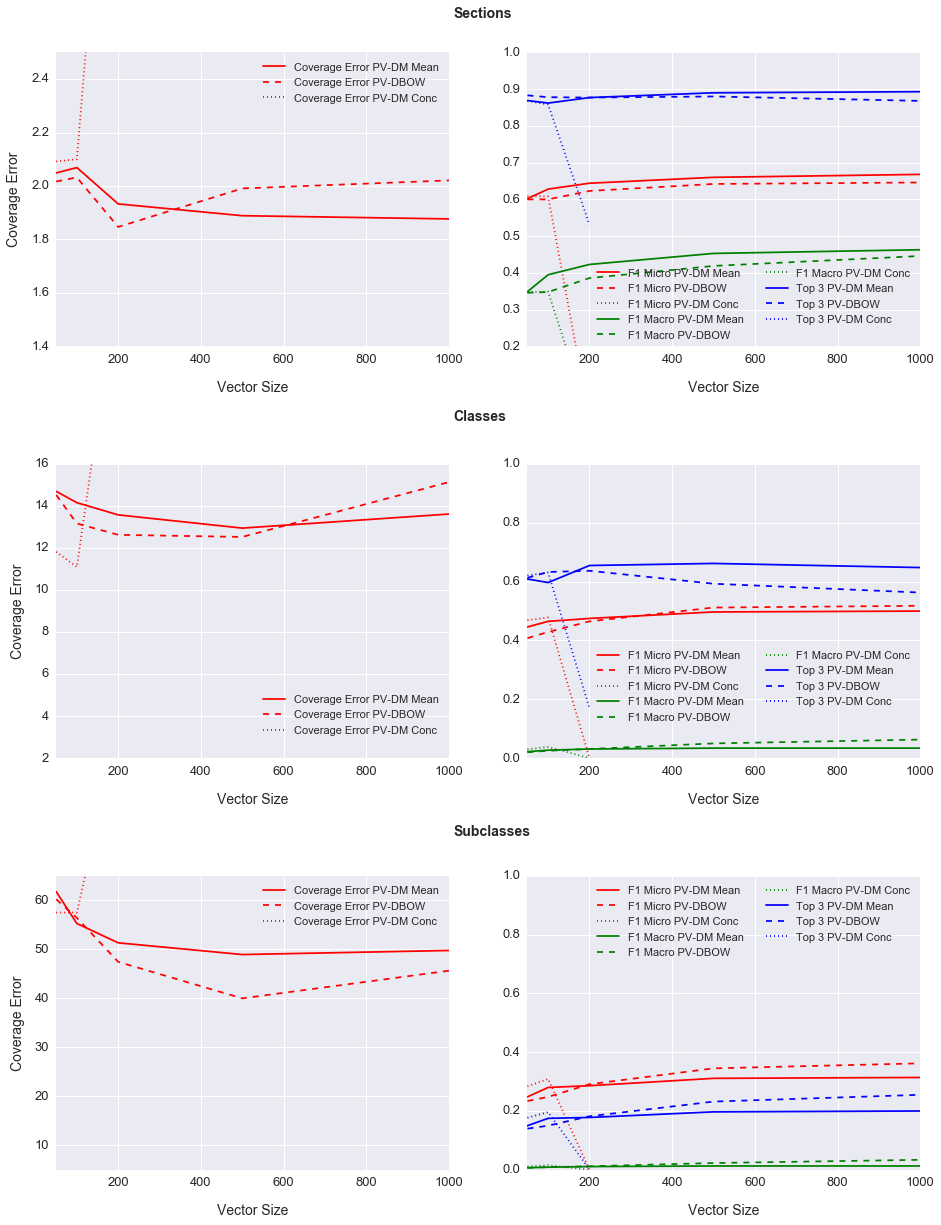

In [128]:
name_1 = 'PV-DM Mean'
name_2 = 'PV-DBOW'
name_3 = 'PV-DM Conc'

fig = plt.figure(figsize=(12,16), dpi=120)
fig.subplots_adjust(top=0.97, bottom=0, left=0, right=1, hspace=0.4)
# fig.subplots_adjust(hspace=0.3)
ax1 = plt.subplot(321)
ax2 = plt.subplot(322)
ax3 = plt.subplot(323)
ax4 = plt.subplot(324)
ax5 = plt.subplot(325)
ax6 = plt.subplot(326)

# Balanced SVM
# vector_sizes =         [50,    100,   200,   500,   1000]

# coverage_errors_1 =      [1.9,   1.911, 1.757, 1.791, 1.747]
# coverage_errors_2 =      [1.856, 1.894, 1.847, 1.842, 1.949]
# coverage_errors_3 =      [1.897, 1.895, 3.503, None, None]

# f1_micro_1 =          [0.581, 0.57,  0.616, 0.603, 0.616]
# f1_micro_2 =          [0.577, 0.577, 0.597, 0.595, 0.568]
# f1_micro_3 =          [0.574, 0.581, 0.243, None, None]

# f1_macro_1 =          [0.492, 0.485, 0.52,  0.513, 0.523]
# f1_macro_2 =          [0.485, 0.486, 0.501, 0.501, 0.482]
# f1_macro_3 =          [0.484, 0.489, 0.194, None, None]

# top_3_1 =             [0.895, 0.892, 0.922, 0.916, 0.924]
# top_3_2 =             [0.904, 0.895, 0.906, 0.906, 0.886]
# top_3_3 =             [0.896, 0.897, 0.645, None, None]


# None SVM
vector_sizes =        [50,    100,   200,   500,   1000]

coverage_errors_1 =   [2.049, 2.069, 1.933, 1.889, 1.877]
coverage_errors_2 =   [2.017, 2.032, 1.847, 1.991, 2.021]
coverage_errors_3 =   [2.092, 2.100, 3.986, None, None]

f1_micro_1 =          [0.602, 0.628, 0.644, 0.660, 0.668]
f1_micro_2 =          [0.600, 0.600, 0.623, 0.642, 0.646]
f1_micro_3 =          [0.609, 0.608, 0.000, None, None]

f1_macro_1 =          [0.349, 0.395, 0.423, 0.453, 0.463]
f1_macro_2 =          [0.346, 0.348, 0.386, 0.419, 0.446]
f1_macro_3 =          [0.348, 0.349, 0.000, None, None]

top_3_1 =             [0.869, 0.862, 0.877, 0.890, 0.893]
top_3_2 =             [0.883, 0.878, 0.877, 0.880, 0.868]
top_3_3 =             [0.868, 0.858, 0.531, None, None]


fig.text(0.46, 1, 'Sections', fontsize=14, fontweight='bold')
add_level_graphs(ax1, ax2, 'Vector Size', SECTIONS_LEFT_MIN, SECTIONS_LEFT_MAX, SECTIONS_RIGHT_MIN, SECTIONS_RIGHT_MAX,
                 right_legend_top_anchor=0.3)

vector_sizes =         [50,    100,   200,   500,   1000]

coverage_errors_1 =      [14.70, 14.16, 13.58, 12.95, 13.62]
coverage_errors_2 =      [14.53, 13.17, 12.63, 12.53, 15.14]
coverage_errors_3 =      [11.82, 11.10, 24.82, None, None]

f1_micro_1 =          [0.446, 0.465, 0.475, 0.497, 0.5]
f1_micro_2 =          [0.408, 0.429, 0.465, 0.512, 0.518]
f1_micro_3 =          [0.469, 0.478, 0.000, None, None]

f1_macro_1 =          [0.022, 0.027, 0.031, 0.034, 0.034]
f1_macro_2 =          [0.020, 0.025, 0.031, 0.050, 0.063]
f1_macro_3 =          [0.030, 0.038, 0.000, None, None]

top_3_1 =             [0.609, 0.597, 0.655, 0.662, 0.648]
top_3_2 =             [0.613, 0.633, 0.637, 0.593, 0.563]
top_3_3 =             [0.621, 0.631, 0.170, None, None]

fig.text(0.46, 0.65, 'Classes', fontsize=14, fontweight='bold')
add_level_graphs(ax3, ax4, 'Vector Size', CLASSES_SVM_LEFT_MIN, CLASSES_SVM_LEFT_MAX, CLASSES_SVM_RIGHT_MIN, CLASSES_SVM_RIGHT_MAX,
                left_legend_top_anchor=0.25, right_legend_top_anchor=0.4)

vector_sizes =         [50,    100,   200,   500,   1000]

coverage_errors_1 =      [61.75,   55.25, 51.31, 48.92, 49.75]
coverage_errors_2 =      [60.20, 56.41, 47.43, 39.98, 45.62]
coverage_errors_3 =      [57.49, 57.49, 94.76, None, None]

f1_micro_1 =          [0.248, 0.280,  0.286, 0.311, 0.314]
f1_micro_2 =          [0.234, 0.248, 0.291, 0.345, 0.362]
f1_micro_3 =          [0.284, 0.309, 0.000, None, None]

f1_macro_1 =          [0.007, 0.009, 0.011,  0.013, 0.013]
f1_macro_2 =          [0.007, 0.009, 0.012, 0.023, 0.034]
f1_macro_3 =          [0.011, 0.016, 0.000, None, None]

top_3_1 =             [0.150, 0.175, 0.178, 0.197, 0.200]
top_3_2 =             [0.140, 0.150, 0.182, 0.232, 0.255]
top_3_3 =             [0.177, 0.196, 0.001, None, None]

fig.text(0.46, 0.29, 'Subclasses', fontsize=14, fontweight='bold')
add_level_graphs(ax5, ax6, 'Vector Size', SUBCLASSES_SVM_LEFT_MIN, SUBCLASSES_SVM_LEFT_MAX, SUBCLASSES_SVM_RIGHT_MIN, SUBCLASSES_SVM_RIGHT_MAX,
                right_legend_top_anchor=1)

## NN Vector Sizes PV-DM Mean vs PV-DM Conc vs PV-DBOW

### All

In [129]:
AXIS_LABELS_FONT_SIZE = 13
X_LABEL_PAD = 15
Y_LABEL_PAD = 10
X_LABEL_FONT_SIZE = 14
Y_LABEL_FONT_SIZE = 14
LEGEND_FONT_SIZE = 12

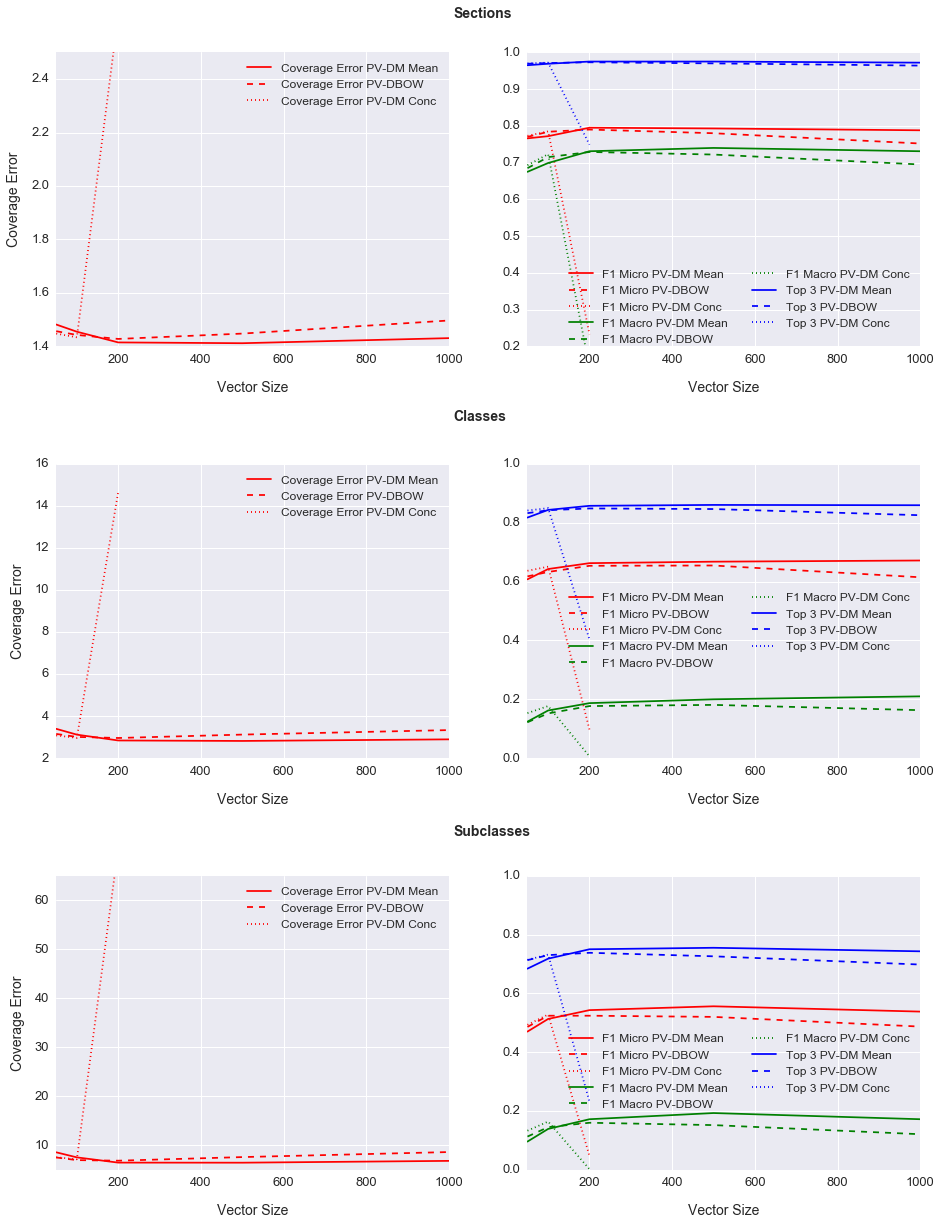

In [130]:
name_1 = 'PV-DM Mean'
name_2 = 'PV-DBOW'
name_3 = 'PV-DM Conc'

fig = plt.figure(figsize=(12,16), dpi=120)
fig.subplots_adjust(top=0.97, bottom=0, left=0, right=1, hspace=0.4)
# fig.subplots_adjust(hspace=0.3)
ax1 = plt.subplot(321)
ax2 = plt.subplot(322)
ax3 = plt.subplot(323)
ax4 = plt.subplot(324)
ax5 = plt.subplot(325)
ax6 = plt.subplot(326)

vector_sizes =         [50,    100,   200,   500,   1000]

coverage_errors_1 =      [1.482, 1.455, 1.415, 1.412, 1.431]
coverage_errors_2 =      [1.457, 1.443, 1.428, 1.448, 1.497]
coverage_errors_3 =      [1.448, 1.434, 2.640, None, None]

f1_micro_1 =          [0.766, 0.772, 0.795, 0.793, 0.788]
f1_micro_2 =          [0.770, 0.784, 0.790, 0.780, 0.752]
f1_micro_3 =          [0.773, 0.785, 0.233, None, None]

f1_macro_1 =          [0.675, 0.699, 0.731, 0.740, 0.731]
f1_macro_2 =          [0.685, 0.715, 0.729, 0.722, 0.695]
f1_macro_3 =          [0.693, 0.723, 0.142, None, None]

top_3_1 =             [0.965, 0.969, 0.975, 0.975, 0.972]
top_3_2 =             [0.969, 0.971, 0.973, 0.970, 0.964]
top_3_3 =             [0.970, 0.972, 0.749, None, None]


fig.text(0.46, 1, 'Sections', fontsize=14, fontweight='bold')
add_level_graphs(ax1, ax2, 'Vector Size', SECTIONS_LEFT_MIN, SECTIONS_LEFT_MAX, SECTIONS_RIGHT_MIN, SECTIONS_RIGHT_MAX,
                 right_legend_top_anchor=0.3)

vector_sizes =         [50,    100,   200,   500,   1000]

coverage_errors_1 =      [3.394, 3.117, 2.840, 2.817, 2.893]
coverage_errors_2 =      [3.152, 3.008, 2.958, 3.120, 3.334]
coverage_errors_3 =      [3.079, 2.965, 14.668, None, None]

f1_micro_1 =          [0.608, 0.643, 0.663, 0.668, 0.672]
f1_micro_2 =          [0.618, 0.633, 0.654, 0.655, 0.615]
f1_micro_3 =          [0.637, 0.651, 0.097, None, None]

f1_macro_1 =          [0.124, 0.162, 0.187, 0.200, 0.210]
f1_macro_2 =          [0.122, 0.152, 0.177, 0.181, 0.163]
f1_macro_3 =          [0.153, 0.177, 0.006, None, None]

top_3_1 =             [0.818, 0.844, 0.858, 0.861, 0.860]
top_3_2 =             [0.833, 0.843, 0.849, 0.847, 0.826]
top_3_3 =             [0.842, 0.850, 0.403, None, None]

fig.text(0.46, 0.65, 'Classes', fontsize=14, fontweight='bold')
add_level_graphs(ax3, ax4, 'Vector Size', CLASSES_NN_LEFT_MIN, CLASSES_NN_LEFT_MAX, CLASSES_NN_RIGHT_MIN, CLASSES_NN_RIGHT_MAX,
                right_legend_top_anchor=0.6)

vector_sizes =         [50,    100,   200,   500,   1000]

coverage_errors_1 =   [8.571, 7.535, 6.466, 6.451, 6.822]
coverage_errors_2 =   [7.514, 6.976, 6.859, 7.594, 8.622]
coverage_errors_3 =   [7.564, 7.144, 70.58, None, None]

f1_micro_1 =          [0.470, 0.513, 0.543, 0.556, 0.538]
f1_micro_2 =          [0.486, 0.524, 0.524, 0.520, 0.487]
f1_micro_3 =          [0.493, 0.528, 0.047, None, None]

f1_macro_1 =          [0.096, 0.139, 0.172, 0.193, 0.172]
f1_macro_2 =          [0.113, 0.145, 0.160, 0.152, 0.121]
f1_macro_3 =          [0.133, 0.164, 0.002, None, None]

top_3_1 =             [0.684, 0.718, 0.750, 0.755, 0.743]
top_3_2 =             [0.713, 0.730, 0.738, 0.726, 0.698]
top_3_3 =             [0.714, 0.732, 0.232, None, None]

fig.text(0.46, 0.29, 'Subclasses', fontsize=14, fontweight='bold')
add_level_graphs(ax5, ax6, 'Vector Size', SUBCLASSES_NN_LEFT_MIN, SUBCLASSES_NN_LEFT_MAX, SUBCLASSES_NN_RIGHT_MIN, SUBCLASSES_NN_RIGHT_MAX,
                right_legend_top_anchor=0.5)

## SVM Window Sizes PV-DM Mean vs PV-DM Conc vs PV-DBOW 

### All

In [98]:
AXIS_LABELS_FONT_SIZE = 13
X_LABEL_PAD = 15
Y_LABEL_PAD = 10
X_LABEL_FONT_SIZE = 14
Y_LABEL_FONT_SIZE = 14
LEGEND_FONT_SIZE = 12

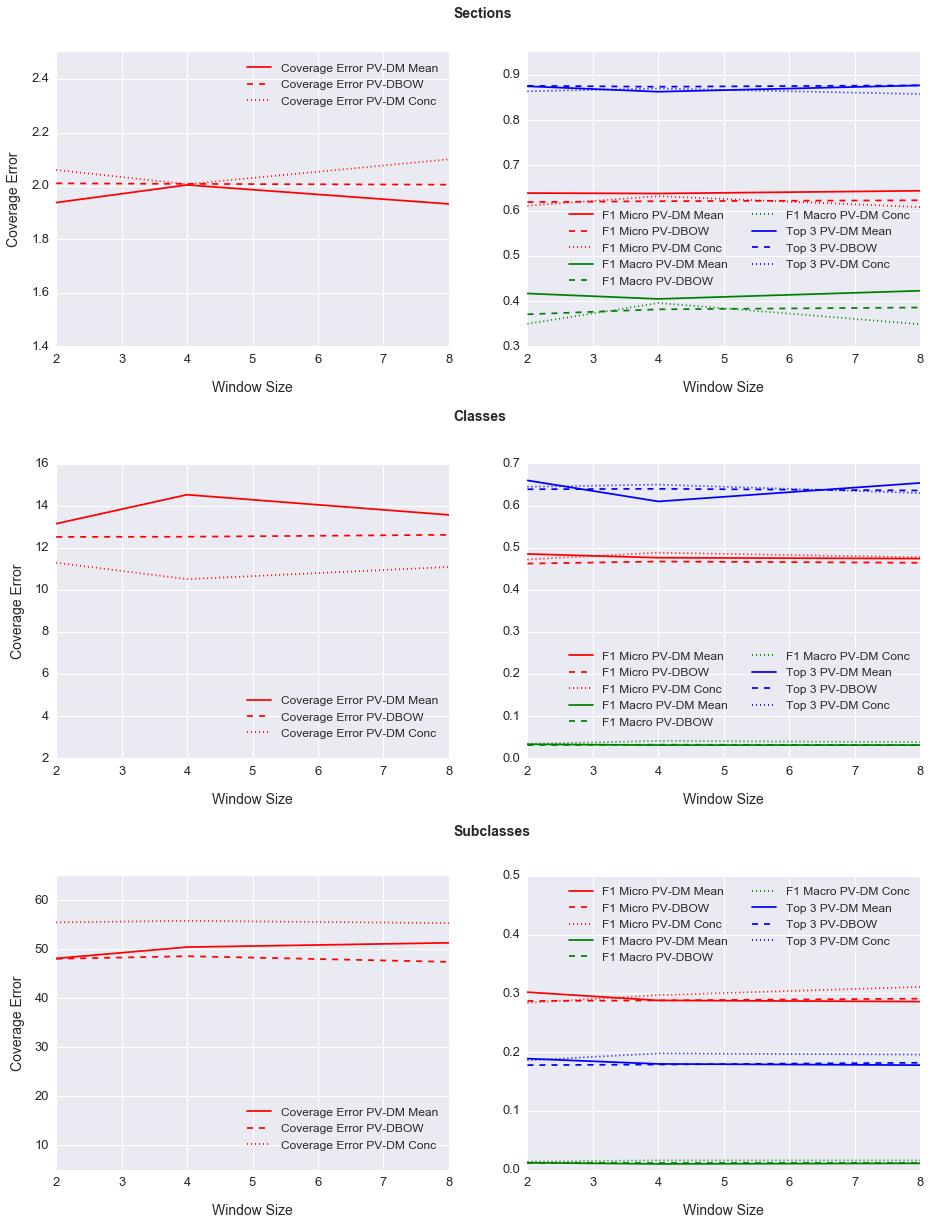

In [133]:
name_1 = 'PV-DM Mean'
name_2 = 'PV-DBOW'
name_3 = 'PV-DM Conc'

fig = plt.figure(figsize=(12,16), dpi=120)
fig.subplots_adjust(top=0.97, bottom=0, left=0, right=1, hspace=0.4)
# fig.subplots_adjust(hspace=0.3)
ax1 = plt.subplot(321)
ax2 = plt.subplot(322)
ax3 = plt.subplot(323)
ax4 = plt.subplot(324)
ax5 = plt.subplot(325)
ax6 = plt.subplot(326)

vector_sizes =         [2,4,8]

# Balanced SVM
# coverage_errors_1 =      [1.797, 1.798, 1.757]
# coverage_errors_2 =      [1.849, 1.830, 1.839]
# coverage_errors_3 =      [1.867, 1.810, 1.895]

# f1_micro_1 =          [0.608, 0.615, 0.616]
# f1_micro_2 =          [0.593, 0.599, 0.597]
# f1_micro_3 =          [0.586, 0.602, 0.581]

# f1_macro_1 =          [0.513, 0.518, 0.52]
# f1_macro_2 =          [0.497, 0.502, 0.501]
# f1_macro_3 =          [0.496, 0.506, 0.489]

# top_3_1 =             [0.914, 0.915, 0.922]
# top_3_2 =             [0.905, 0.909, 0.906]
# top_3_3 =             [0.902, 0.913, 0.897]

# None Weights
coverage_errors_1 =      [1.938, 2.004, 1.933]
coverage_errors_2 =      [2.010, 2.008, 2.005]
coverage_errors_3 =      [2.060, 2.007, 2.100]

f1_micro_1 =          [0.639, 0.638, 0.644]
f1_micro_2 =          [0.619, 0.621, 0.623]
f1_micro_3 =          [0.611, 0.632, 0.608]

f1_macro_1 =          [0.417, 0.405, 0.423]
f1_macro_2 =          [0.371, 0.382, 0.386]
f1_macro_3 =          [0.350, 0.396, 0.349]

top_3_1 =             [0.875, 0.863, 0.877]
top_3_2 =             [0.876, 0.874, 0.877]
top_3_3 =             [0.864, 0.870, 0.858]


fig.text(0.46, 1, 'Sections', fontsize=14, fontweight='bold')
add_level_graphs(ax1, ax2, 'Window Size', SECTIONS_LEFT_MIN, SECTIONS_LEFT_MAX, 0.3, 0.95,
                 right_legend_top_anchor=0.5)

vector_sizes =         [2,4,8]

coverage_errors_1 =      [13.16, 14.54, 13.58]
coverage_errors_2 =      [12.53, 12.54, 12.63]
coverage_errors_3 =      [11.30, 10.52, 11.10]

f1_micro_1 =          [0.486, 0.477, 0.475]
f1_micro_2 =          [0.463, 0.468, 0.465]
f1_micro_3 =          [0.473, 0.489, 0.478]

f1_macro_1 =          [0.033, 0.031, 0.031]
f1_macro_2 =          [0.031, 0.032, 0.031]
f1_macro_3 =          [0.034, 0.041, 0.038]

top_3_1 =             [0.661, 0.611, 0.655]
top_3_2 =             [0.640, 0.641, 0.637]
top_3_3 =             [0.646, 0.651, 0.631]

fig.text(0.46, 0.65, 'Classes', fontsize=14, fontweight='bold')
add_level_graphs(ax3, ax4, 'Window Size', CLASSES_SVM_LEFT_MIN, CLASSES_SVM_LEFT_MAX, CLASSES_RIGHT_MIN, 0.7,
                left_legend_top_anchor=0.25, right_legend_top_anchor=0.4)

vector_sizes =         [2,4,8]

coverage_errors_1 =      [48.13, 50.44, 51.31]
coverage_errors_2 =      [48.05, 48.58, 47.43]
coverage_errors_3 =      [55.49, 55.79, 55.34]

f1_micro_1 =          [0.302, 0.288, 0.286]
f1_micro_2 =          [0.287, 0.288, 0.291]
f1_micro_3 =          [0.284, 0.297, 0.311]

f1_macro_1 =          [0.012, 0.010, 0.011]
f1_macro_2 =          [0.012, 0.012, 0.012]
f1_macro_3 =          [0.014, 0.016, 0.016]

top_3_1 =             [0.189, 0.180, 0.178]
top_3_2 =             [0.178, 0.179, 0.182]
top_3_3 =             [0.186, 0.198, 0.196]

fig.text(0.46, 0.29, 'Subclasses', fontsize=14, fontweight='bold')
add_level_graphs(ax5, ax6, 'Window Size', SUBCLASSES_SVM_LEFT_MIN, SUBCLASSES_SVM_LEFT_MAX, SUBCLASSES_RIGHT_MIN, 0.5,
                left_legend_top_anchor=0.25, right_legend_top_anchor=1)

## NN Window Sizes: PV-DM Mean vs PV-DM Conc vs PV-DBOW

### All

In [85]:
AXIS_LABELS_FONT_SIZE = 13
X_LABEL_PAD = 15
Y_LABEL_PAD = 10
X_LABEL_FONT_SIZE = 14
Y_LABEL_FONT_SIZE = 14
LEGEND_FONT_SIZE = 12

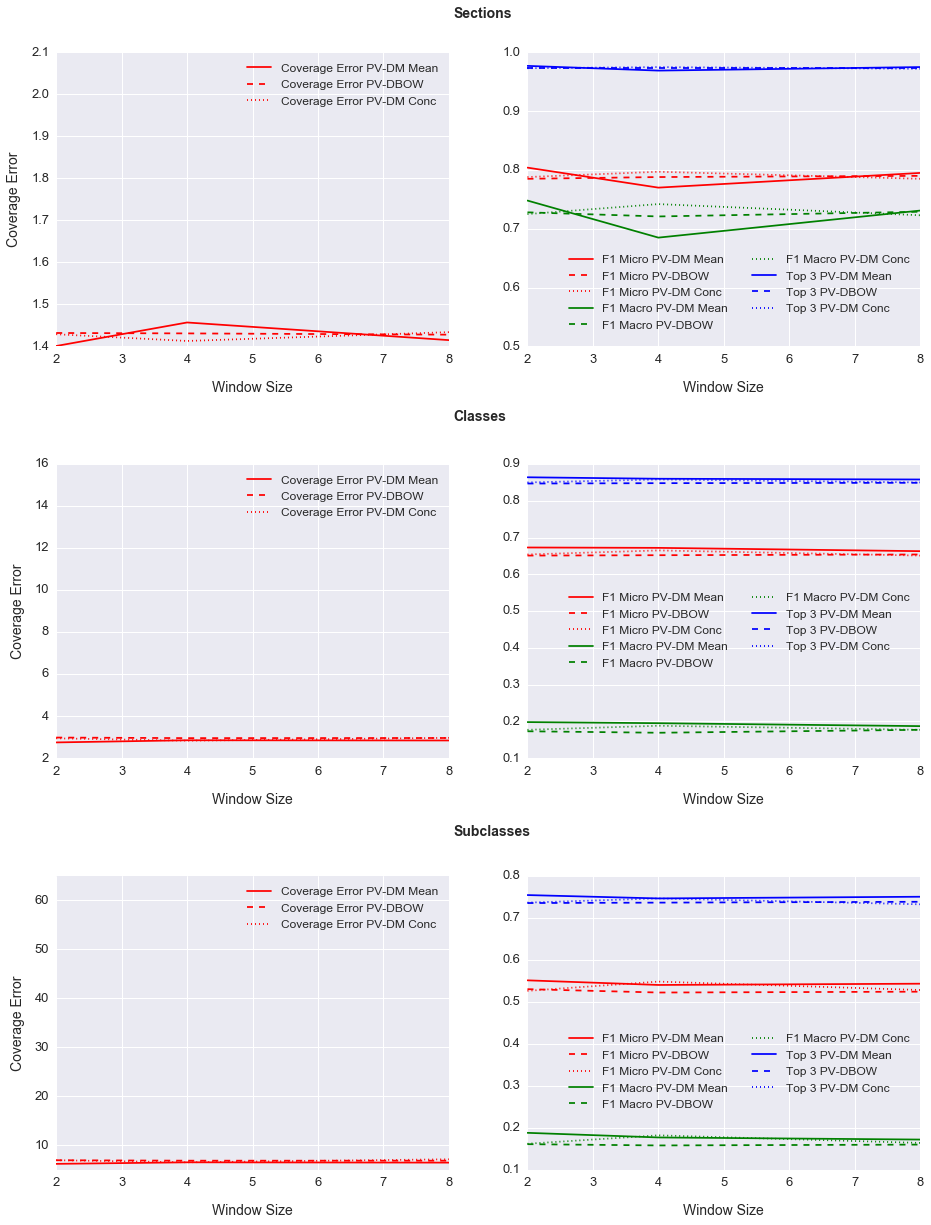

In [109]:
name_1 = 'PV-DM Mean'
name_2 = 'PV-DBOW'
name_3 = 'PV-DM Conc'

fig = plt.figure(figsize=(12,16), dpi=120)
fig.subplots_adjust(top=0.97, bottom=0, left=0, right=1, hspace=0.4)
# fig.subplots_adjust(hspace=0.3)
ax1 = plt.subplot(321)
ax2 = plt.subplot(322)
ax3 = plt.subplot(323)
ax4 = plt.subplot(324)
ax5 = plt.subplot(325)
ax6 = plt.subplot(326)

vector_sizes =         [2,4,8]

coverage_errors_1 =   [1.401, 1.457, 1.415]
coverage_errors_2 =   [1.432, 1.431, 1.428]
coverage_errors_3 =   [1.429, 1.413, 1.434]

f1_micro_1 =          [0.804, 0.770, 0.795]
f1_micro_2 =          [0.785, 0.788, 0.790]
f1_micro_3 =          [0.788, 0.797, 0.785]

f1_macro_1 =          [0.748, 0.685, 0.731]
f1_macro_2 =          [0.728, 0.721, 0.729]
f1_macro_3 =          [0.725, 0.742, 0.723]

top_3_1 =             [0.977, 0.969, 0.975]
top_3_2 =             [0.973, 0.973, 0.973]
top_3_3 =             [0.973, 0.975, 0.972]


fig.text(0.46, 1, 'Sections', fontsize=14, fontweight='bold')
add_level_graphs(ax1, ax2, 'Window Size', SECTIONS_LEFT_MIN, SECTIONS_LEFT_MAX, 0.5, SECTIONS_RIGHT_MAX,
                 right_legend_top_anchor=0.35)

vector_sizes =         [2,4,8]

coverage_errors_1 =   [2.747, 2.850, 2.840]
coverage_errors_2 =   [2.979, 2.952, 2.958]
coverage_errors_3 =   [2.941, 2.830, 2.965]

f1_micro_1 =          [0.673, 0.672, 0.663]
f1_micro_2 =          [0.651, 0.652, 0.654]
f1_micro_3 =          [0.654, 0.665, 0.651]

f1_macro_1 =          [0.198, 0.195, 0.187]
f1_macro_2 =          [0.173, 0.169, 0.177]
f1_macro_3 =          [0.177, 0.188, 0.177]

top_3_1 =             [0.864, 0.860, 0.858]
top_3_2 =             [0.847, 0.848, 0.849]
top_3_3 =             [0.850, 0.858, 0.850]

fig.text(0.46, 0.65, 'Classes', fontsize=14, fontweight='bold')
add_level_graphs(ax3, ax4, 'Window Size', CLASSES_NN_LEFT_MIN, CLASSES_NN_LEFT_MAX, 0.1, 0.9,
                right_legend_top_anchor=0.6)

vector_sizes =         [2,4,8]

coverage_errors_1 =   [6.212, 6.526, 6.466]
coverage_errors_2 =   [6.951, 6.862, 6.859]
coverage_errors_3 =   [6.949, 6.533, 7.144]

f1_micro_1 =          [0.551, 0.540, 0.543]
f1_micro_2 =          [0.530, 0.522, 0.524]
f1_micro_3 =          [0.526, 0.548, 0.528]

f1_macro_1 =          [0.188, 0.177, 0.172]
f1_macro_2 =          [0.161, 0.158, 0.160]
f1_macro_3 =          [0.162, 0.182, 0.164]

top_3_1 =             [0.754, 0.746, 0.750]
top_3_2 =             [0.735, 0.736, 0.738]
top_3_3 =             [0.736, 0.746, 0.732]

fig.text(0.46, 0.29, 'Subclasses', fontsize=14, fontweight='bold')
add_level_graphs(ax5, ax6, 'Window Size', SUBCLASSES_NN_LEFT_MIN, SUBCLASSES_NN_LEFT_MAX, 0.1, 0.8,
                right_legend_top_anchor=0.5)

## Word2vec scores

In [4]:
mean_window_sizes = [2,4,8]
mean_vector_sizes = [100,200,500,1000]
panel_names = ["total", "syntactic", "semantic"]

#conc_df = pd.DataFrame(index=conc_window_sizes, columns=mean_vector_sizes)
mean_df = pd.Panel(items=panel_names, major_axis=mean_window_sizes, minor_axis=conc_vector_sizes)


In [18]:
conc_df.loc[8][50] = 478
conc_df.loc[5][100] = 1857
conc_df.loc[8][100] = 1386
conc_df.loc[8][200] = 274

In [19]:
conc_df

,50,100,200
2,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,1857,NaN
8,478,1386,274


In [51]:
mean_df["total"].loc[2][200] = 3281
mean_df["syntactic"].loc[2][200] = 3083
mean_df["semantic"].loc[2][200] = 198

mean_df["total"].loc[4][200] = 2827
mean_df["syntactic"].loc[4][200] = 2600
mean_df["semantic"].loc[4][200] = 227

mean_df["total"].loc[8][200] = 2755
mean_df["syntactic"].loc[8][200] = 2658
mean_df["semantic"].loc[8][200] = 97

mean_df["total"].loc[8][100] = 2306
mean_df["syntactic"].loc[8][100] = 2142
mean_df["semantic"].loc[8][100] = 164

mean_df["total"].loc[8][500] = 3025
mean_df["syntactic"].loc[8][500] = 2880
mean_df["semantic"].loc[8][500] = 145

mean_df["total"].loc[8][1000] = 3115
mean_df["syntactic"].loc[8][1000] = 2927
mean_df["semantic"].loc[8][1000] = 188


In [52]:
mean_df["total"] = (mean_df["total"] / 12607) * 100
mean_df["syntactic"] = (mean_df["syntactic"] / 9172) * 100
mean_df["semantic"] = (mean_df["semantic"] / 3435) * 100

In [49]:
mean_df["total"]

,100,200,500,1000
2,NaN,26.025224,NaN,NaN
4,NaN,22.424050,NaN,NaN
8,18.291425,21.852939,23.994606,24.708495


In [31]:
mean_df_epochs = pd.DataFrame(index=mean_window_sizes, columns=mean_vector_sizes)
mean_df_epochs.loc[2][200] = 10
mean_df_epochs.loc[4][200] = 4
mean_df_epochs.loc[8][200] = 14
mean_df_epochs.loc[8][100] = 5
mean_df_epochs.loc[8][500] = 8
mean_df_epochs.loc[8][1000] = 6
mean_df_epochs

,100,200,500,1000
2,NaN,10,NaN,NaN
4,NaN,4,NaN,NaN
8,5,14,8,6


#### PV-DM Mean Word2vec

In [94]:
AXIS_LABELS_FONT_SIZE = 13
X_LABEL_PAD = 15
Y_LABEL_PAD = 10
X_LABEL_FONT_SIZE = 14
Y_LABEL_FONT_SIZE = 14
LEGEND_FONT_SIZE = 11

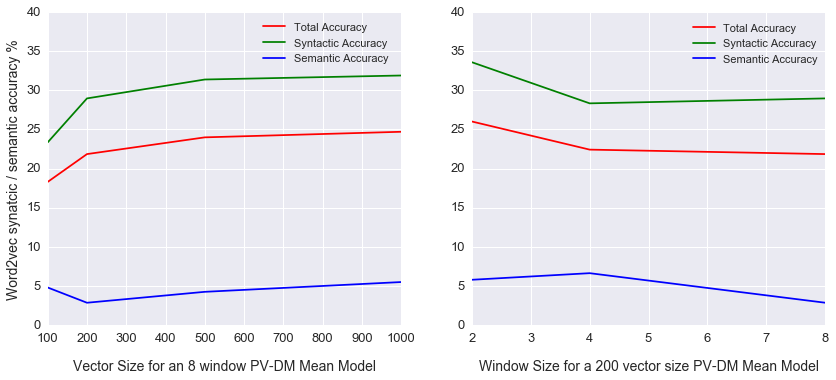

In [95]:
name_1 = ''

fig = plt.figure(figsize=(12,7), dpi=160)
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
fig.subplots_adjust(top=0.72, bottom=0.1, left=0.05, right=0.95)

ax1.set_xlabel("Vector Size for an 8 window PV-DM Mean Model", fontsize=X_LABEL_FONT_SIZE, labelpad=X_LABEL_PAD)
ax1.set_ylabel("Word2vec synatcic / semantic accuracy %", fontsize=Y_LABEL_FONT_SIZE, labelpad=Y_LABEL_PAD)
ax_1_line_1, = ax1.plot(mean_df["total"].columns, mean_df["total"].loc[8], 'r-', label='Total Accuracy {}'.format(name_1))
ax_1_line_2, = ax1.plot(mean_df["total"].columns, mean_df["syntactic"].loc[8], 'g-', label='Syntactic Accuracy {}'.format(name_1))
ax_1_line_3, = ax1.plot(mean_df["total"].columns, mean_df["semantic"].loc[8], 'b-', label='Semantic Accuracy {}'.format(name_1))
ax1.set_ylim(0,40)
ax1.tick_params(labelsize=AXIS_LABELS_FONT_SIZE)


ax2.set_xlabel("Window Size for a 200 vector size PV-DM Mean Model", fontsize=X_LABEL_FONT_SIZE, labelpad=X_LABEL_PAD)
ax_2_line_1, = ax2.plot(mean_df["total"].index, mean_df["total"].loc[:, 200], 'r-', label='Total Accuracy {}'.format(name_1))
ax_2_line_2, = ax2.plot(mean_df["total"].index, mean_df["syntactic"].loc[:, 200], 'g-', label='Syntactic Accuracy {}'.format(name_1))
ax_2_line_3, = ax2.plot(mean_df["total"].index, mean_df["semantic"].loc[:, 200], 'b-', label='Semantic Accuracy {}'.format(name_1))
ax2.set_ylim(0,40)
ax2.tick_params(labelsize=AXIS_LABELS_FONT_SIZE)


ax1.legend(handles=[ax_1_line_1, ax_1_line_2, ax_1_line_3], fontsize=LEGEND_FONT_SIZE, bbox_to_anchor=(1, 1))
#ax.axis([first_epoch, last_epoch, 0, self.coverage_error_max])

ax2.legend(handles=[ax_2_line_1, ax_2_line_2, ax_2_line_3],
                  bbox_to_anchor=(1, 0.98), fontsize=11, borderaxespad=0.)

In [60]:
mean_df["total"].index

Int64Index([2, 4, 8], dtype='int64')

#### PV-DM Concatenate Word2vec

In [113]:
conc_window_sizes = [2,4,8]
conc_vector_sizes = [50,100,200]
panel_names = ["total", "syntactic", "semantic"]
conc_df = pd.Panel(items=panel_names, major_axis=conc_window_sizes, minor_axis=conc_vector_sizes)

In [114]:
conc_df["total"].loc[2][100] = 2390
conc_df["syntactic"].loc[2][100] = 2307
conc_df["semantic"].loc[2][100] = 83

conc_df["total"].loc[4][100] = 2723
conc_df["syntactic"].loc[4][100] = 2630
conc_df["semantic"].loc[4][100] = 93

conc_df["total"].loc[8][50] = 627
conc_df["syntactic"].loc[8][50] = 596
conc_df["semantic"].loc[8][50] = 31

conc_df["total"].loc[8][100] = 1626
conc_df["syntactic"].loc[8][100] = 1547
conc_df["semantic"].loc[8][100] = 79

conc_df["total"].loc[8][200] = 359
conc_df["syntactic"].loc[8][200] = 350
conc_df["semantic"].loc[8][200] = 9


In [115]:
conc_df["total"] = (conc_df["total"] / 12607) * 100
conc_df["syntactic"] = (conc_df["syntactic"] / 9172) * 100
conc_df["semantic"] = (conc_df["semantic"] / 3435) * 100

In [116]:
conc_df["total"]

,50,100,200
2,NaN,18.957722,NaN
4,NaN,21.599112,NaN
8,4.973427,12.897597,2.847624


In [117]:
AXIS_LABELS_FONT_SIZE = 13
X_LABEL_PAD = 15
Y_LABEL_PAD = 10
X_LABEL_FONT_SIZE = 14
Y_LABEL_FONT_SIZE = 14
LEGEND_FONT_SIZE = 11

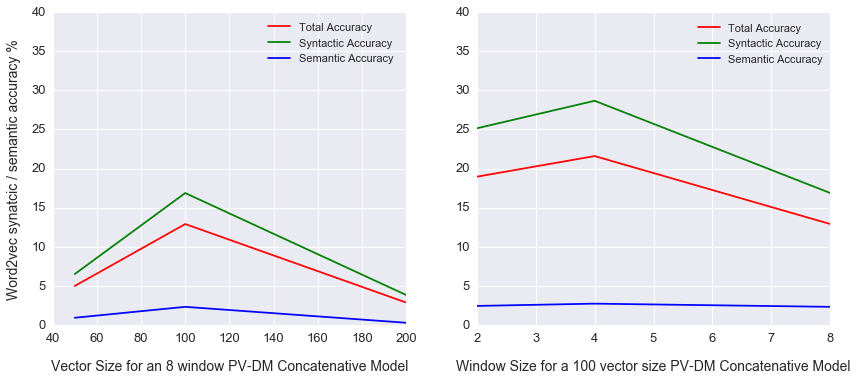

In [118]:
name_1 = ''

fig = plt.figure(figsize=(12,7), dpi=160)
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
fig.subplots_adjust(top=0.72, bottom=0.1, left=0.05, right=0.95)

ax1.set_xlabel("Vector Size for an 8 window PV-DM Concatenative Model", fontsize=X_LABEL_FONT_SIZE, labelpad=X_LABEL_PAD)
ax1.set_ylabel("Word2vec synatcic / semantic accuracy %", fontsize=Y_LABEL_FONT_SIZE, labelpad=Y_LABEL_PAD)
ax_1_line_1, = ax1.plot(conc_df["total"].columns, conc_df["total"].loc[8], 'r-', label='Total Accuracy {}'.format(name_1))
ax_1_line_2, = ax1.plot(conc_df["total"].columns, conc_df["syntactic"].loc[8], 'g-', label='Syntactic Accuracy {}'.format(name_1))
ax_1_line_3, = ax1.plot(conc_df["total"].columns, conc_df["semantic"].loc[8], 'b-', label='Semantic Accuracy {}'.format(name_1))
ax1.set_ylim(0,40)
ax1.tick_params(labelsize=AXIS_LABELS_FONT_SIZE)


ax2.set_xlabel("Window Size for a 100 vector size PV-DM Concatenative Model", fontsize=X_LABEL_FONT_SIZE, labelpad=X_LABEL_PAD)
ax_2_line_1, = ax2.plot(conc_df["total"].index, conc_df["total"].loc[:, 100], 'r-', label='Total Accuracy {}'.format(name_1))
ax_2_line_2, = ax2.plot(conc_df["total"].index, conc_df["syntactic"].loc[:, 100], 'g-', label='Syntactic Accuracy {}'.format(name_1))
ax_2_line_3, = ax2.plot(conc_df["total"].index, conc_df["semantic"].loc[:, 100], 'b-', label='Semantic Accuracy {}'.format(name_1))
ax2.set_ylim(0,40)
ax2.tick_params(labelsize=AXIS_LABELS_FONT_SIZE)


ax1.legend(handles=[ax_1_line_1, ax_1_line_2, ax_1_line_3], fontsize=LEGEND_FONT_SIZE, bbox_to_anchor=(1, 1))
#ax.axis([first_epoch, last_epoch, 0, self.coverage_error_max])

ax2.legend(handles=[ax_2_line_1, ax_2_line_2, ax_2_line_3],
                  bbox_to_anchor=(1, 0.98), fontsize=11, borderaxespad=0.)